# **Team 1**

- Sherma Thangam S
- Shanmugakumar
- Rohit
- Debojit

## Task 1

In [2]:
from google.colab import auth
import pandas as pd
import gspread
from google.auth import default
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

# Replace 'Your spreadsheet name' with the actual name of your spreadsheet
# Replace 'Sheet1' with the name of the sheet you want to access

worksheet = gc.open('cancer patient data sets').worksheet('Sheet')


# Get all values from the worksheet

data = worksheet.get_all_values()

In [3]:
# data to dataframe
df = pd.DataFrame(data[1:], columns=data[0])
print(df.head())

  Patient Id Age Gender Air Pollution Alcohol use Dust Allergy  \
0         P1  33      1             2           4            5   
1        P10  17      1             3           1            5   
2       P100  35      1             4           5            6   
3      P1000  37      1             7           7            7   
4       P101  46      1             6           8            7   

  OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  ...  \
0                    4            3                    2             2  ...   
1                    3            4                    2             2  ...   
2                    5            5                    4             6  ...   
3                    7            6                    7             7  ...   
4                    7            7                    6             7  ...   

  Fatigue Weight Loss Shortness of Breath Wheezing Swallowing Difficulty  \
0       3           4                   2        2  

In [4]:
df['Level'].describe()

count     1000
unique       3
top       High
freq       365
Name: Level, dtype: object

In [5]:
# Create a mapping from categorical levels to numerical values
level_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Apply the mapping to the 'Level' column
df['Level'] = df['Level'].map(level_mapping)
df.drop('Patient Id', axis=1, inplace=True)
print(df.head())


  Age Gender Air Pollution Alcohol use Dust Allergy OccuPational Hazards  \
0  33      1             2           4            5                    4   
1  17      1             3           1            5                    3   
2  35      1             4           5            6                    5   
3  37      1             7           7            7                    7   
4  46      1             6           8            7                    7   

  Genetic Risk chronic Lung Disease Balanced Diet Obesity  ... Fatigue  \
0            3                    2             2       4  ...       3   
1            4                    2             2       2  ...       1   
2            5                    4             6       7  ...       8   
3            6                    7             7       7  ...       4   
4            7                    6             7       7  ...       3   

  Weight Loss Shortness of Breath Wheezing Swallowing Difficulty  \
0           4                 

In [6]:
# Convert relevant columns to numeric, handling errors
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. Check for inconsistent data types.")
df.convert_dtypes().dtypes

Age                         Int64
Gender                      Int64
Air Pollution               Int64
Alcohol use                 Int64
Dust Allergy                Int64
OccuPational Hazards        Int64
Genetic Risk                Int64
chronic Lung Disease        Int64
Balanced Diet               Int64
Obesity                     Int64
Smoking                     Int64
Passive Smoker              Int64
Chest Pain                  Int64
Coughing of Blood           Int64
Fatigue                     Int64
Weight Loss                 Int64
Shortness of Breath         Int64
Wheezing                    Int64
Swallowing Difficulty       Int64
Clubbing of Finger Nails    Int64
Frequent Cold               Int64
Dry Cough                   Int64
Snoring                     Int64
Level                       Int64
dtype: object

In [7]:
numerical_features = df.select_dtypes(include=['number']) # Exclude 'Patient Id'
correlations = numerical_features.corr()['Level'].abs().sort_values(ascending=False)

# Print correlations, excluding 'Level' itself
print("Feature Importance (Correlation):\n", correlations[1:])

# Visualization using SVD
X = df.drop(['Level'], axis=1)  # Features (exclude 'Level' and 'Patient Id')
Y = df['Level']  # Target

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

Feature Importance (Correlation):
 Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Gender                      0.164985
Age                         0.060048
Name: Level, dtype: float64


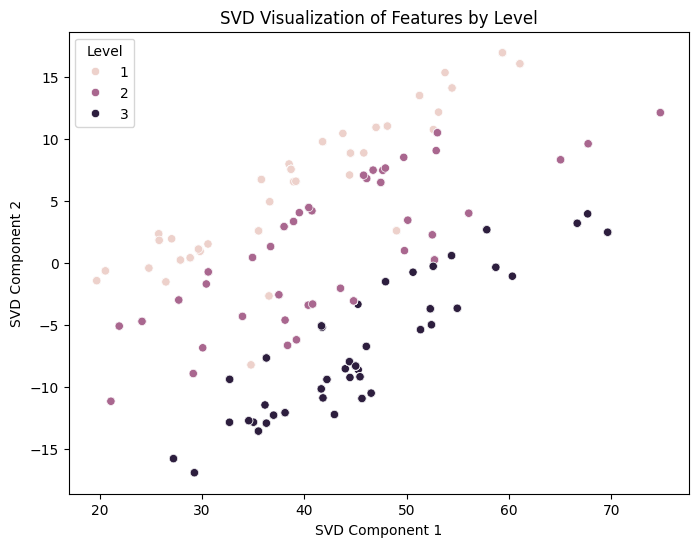

In [8]:
svd = TruncatedSVD(n_components=2) # Reduce to 2 components for visualization
X_svd = svd.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=Y)
plt.title('SVD Visualization of Features by Level')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()

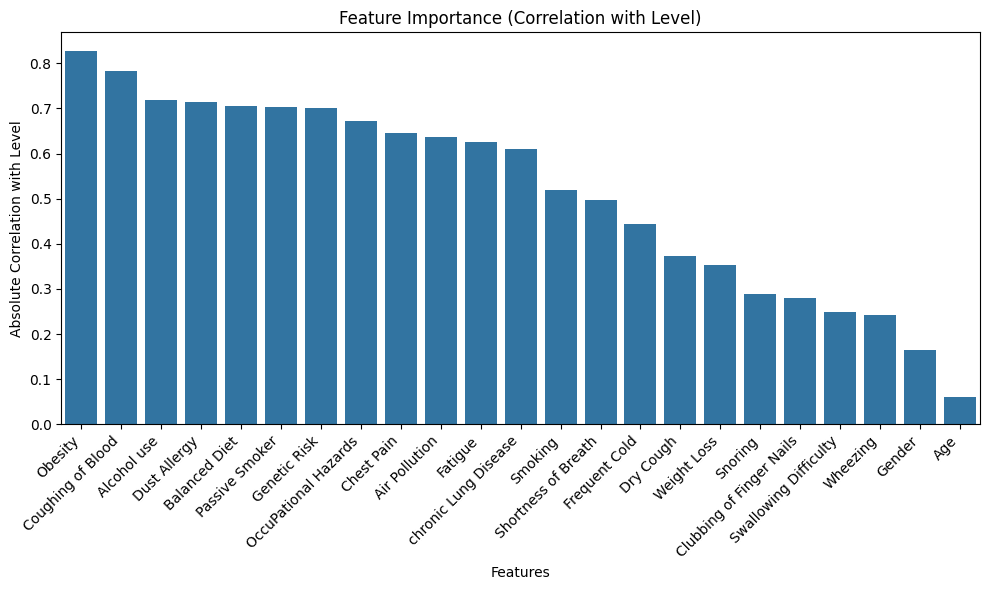

In [9]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=correlations[1:].index, y=correlations[1:].values)
plt.title('Feature Importance (Correlation with Level)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

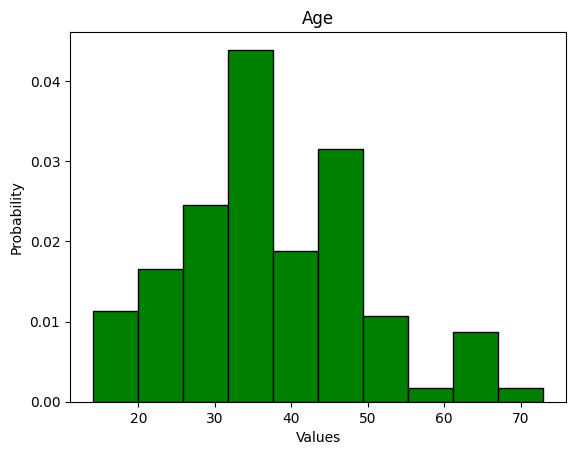

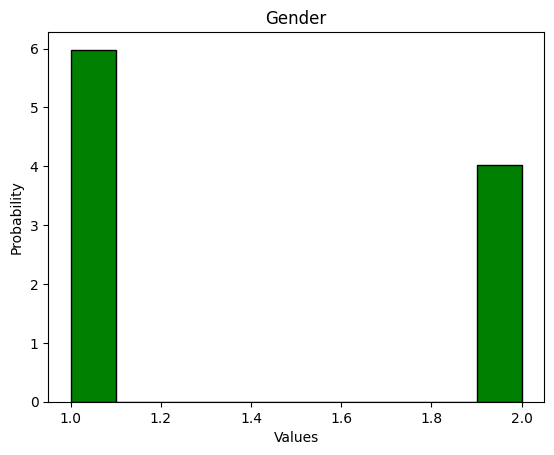

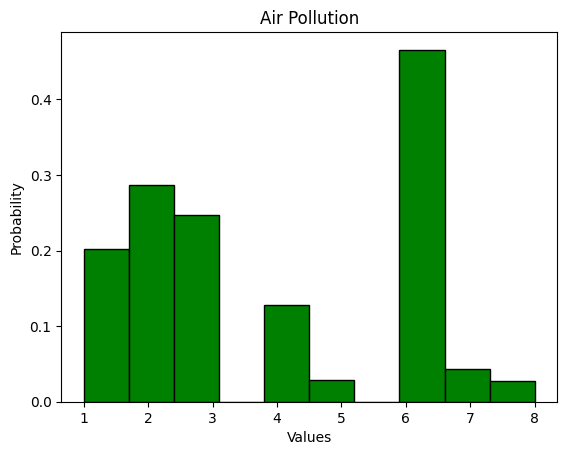

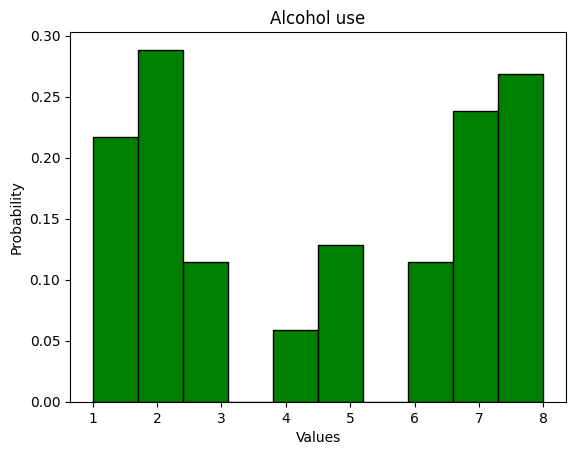

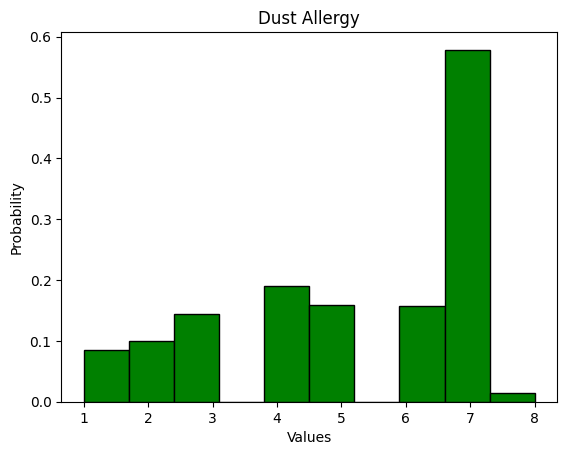

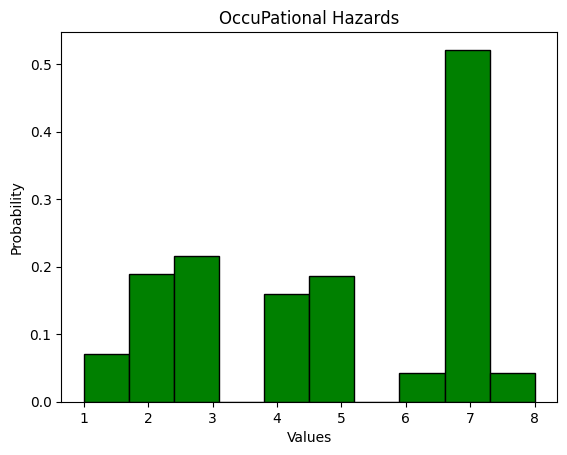

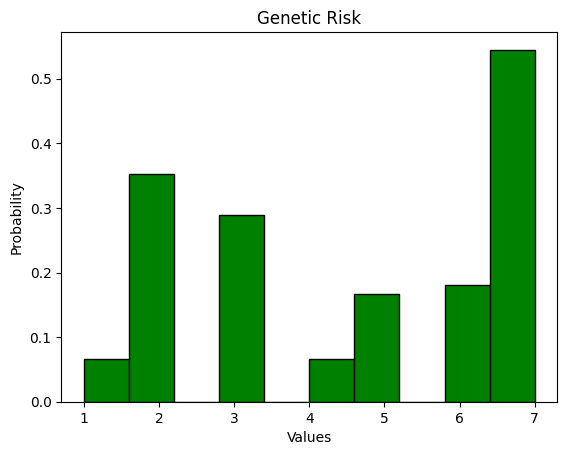

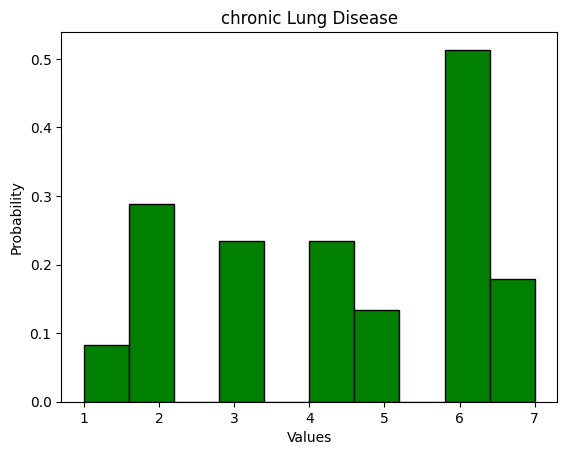

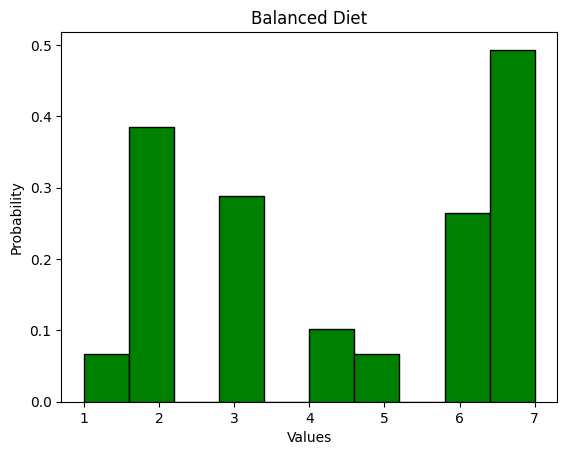

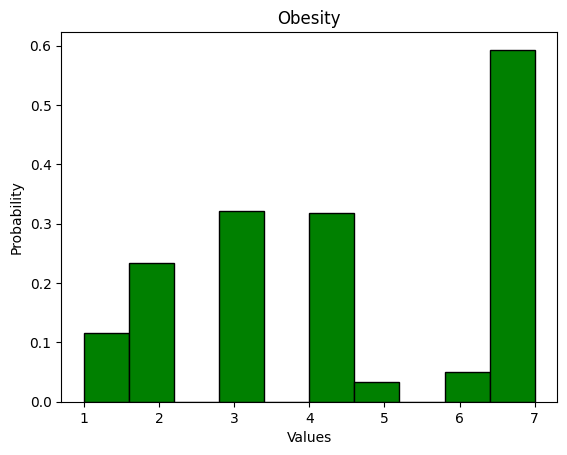

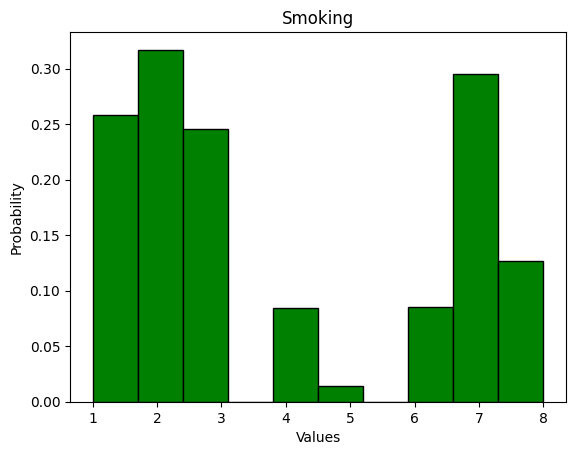

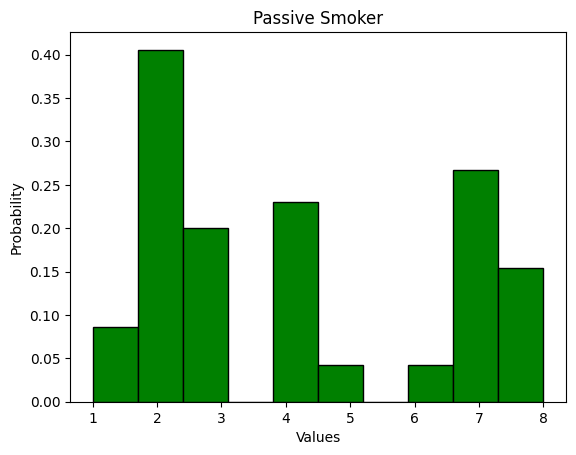

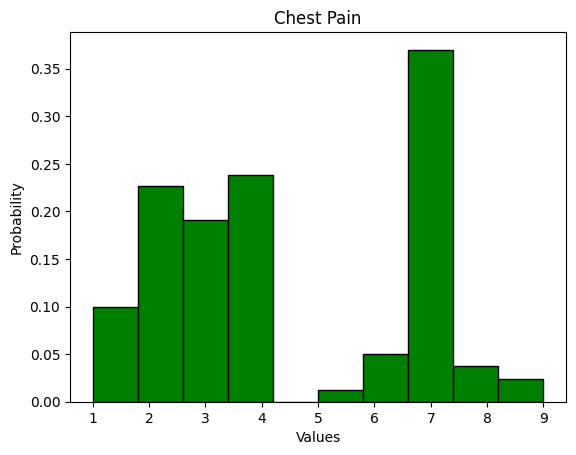

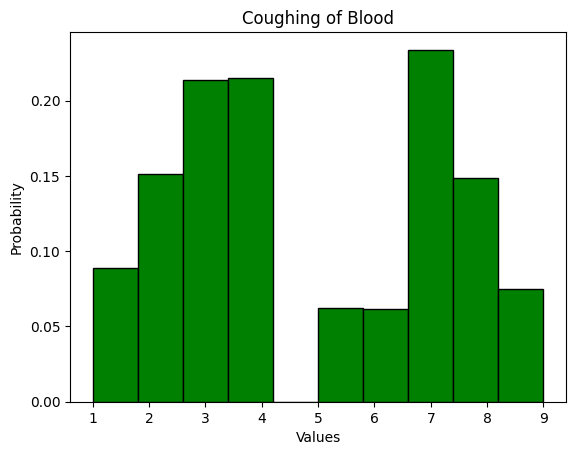

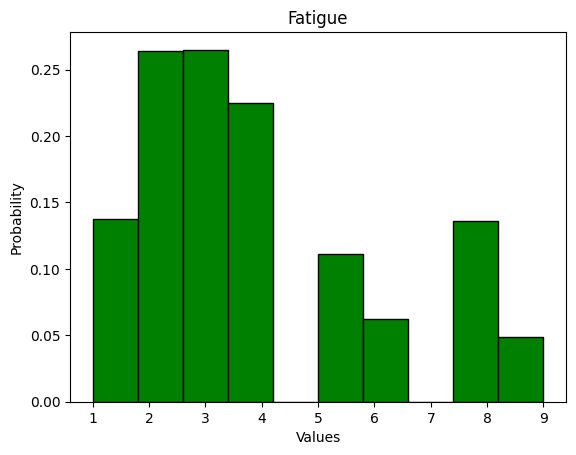

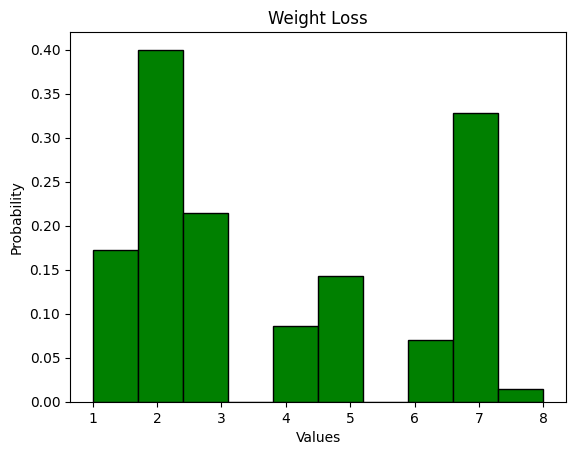

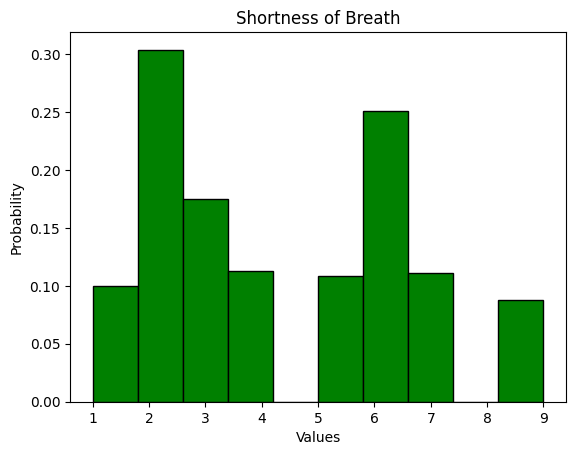

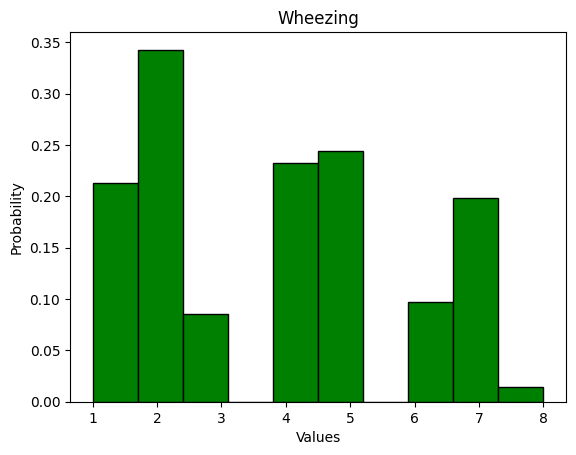

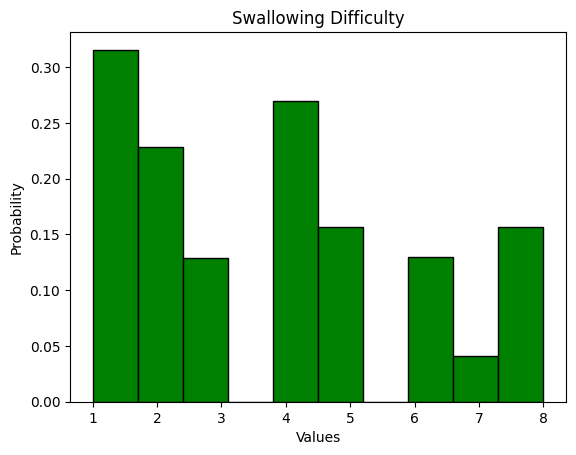

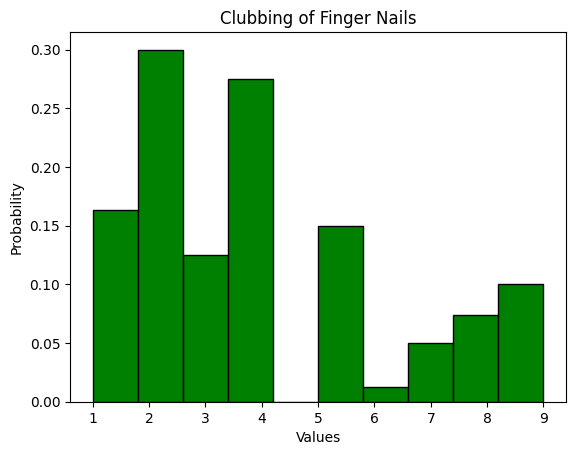

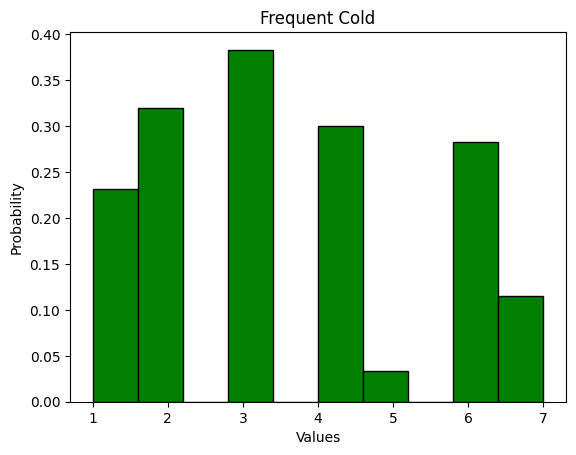

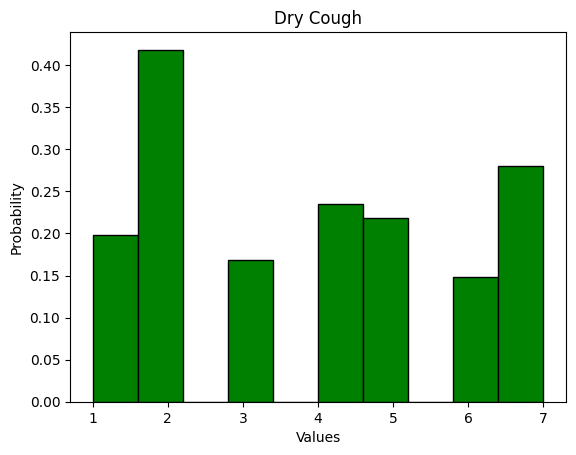

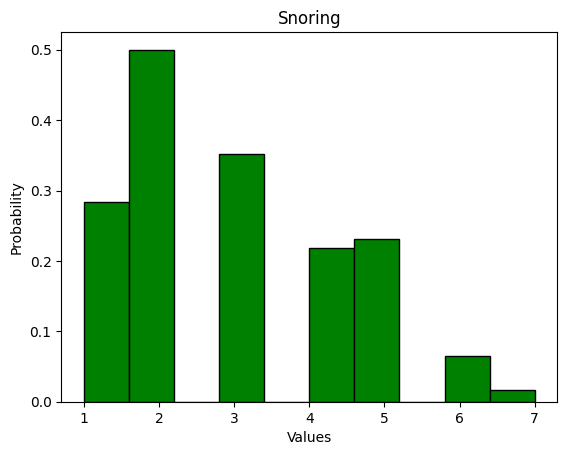

In [10]:
from matplotlib.ticker import PercentFormatter
import numpy as np
for i in X.columns:
  plt.hist(X[i], density=True, weights=np.ones(len(X[i])) / len(X[i]) * 100, color='green', edgecolor='black')
  plt.xlabel('Values')
  plt.ylabel('Probability')
  plt.title(i)
  plt.show()

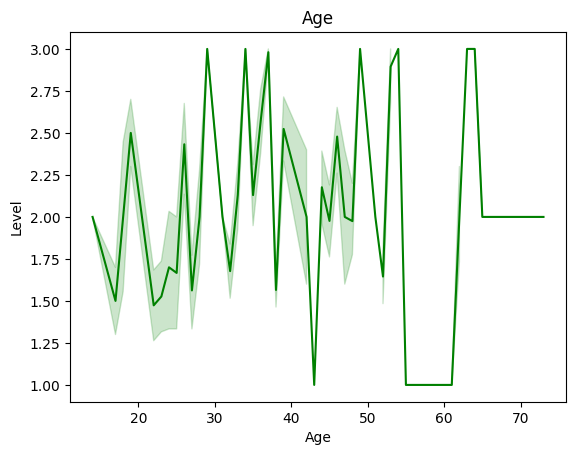

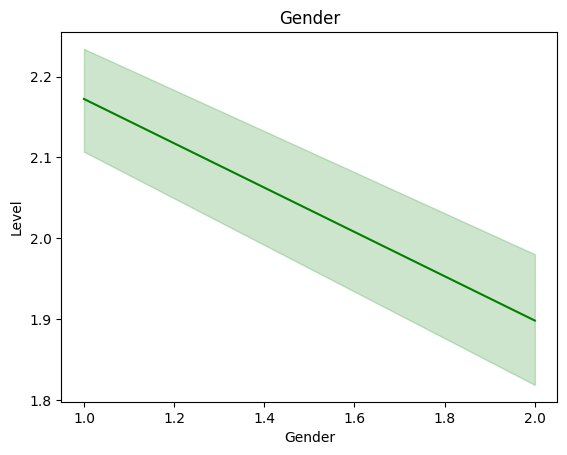

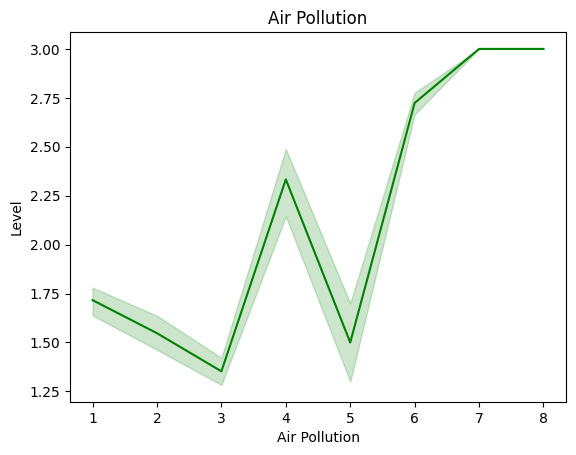

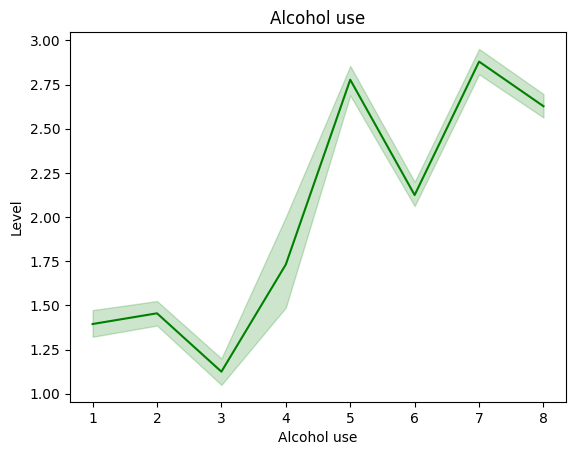

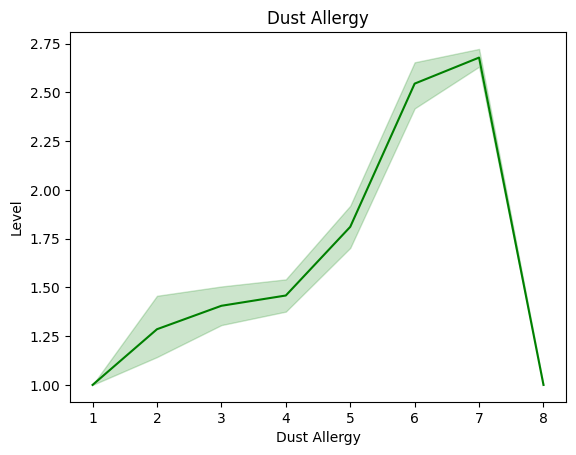

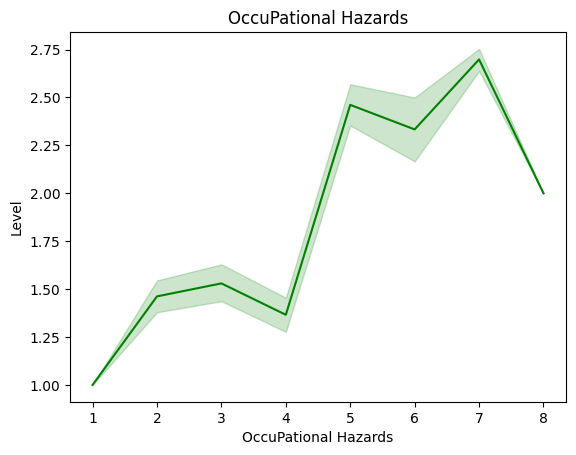

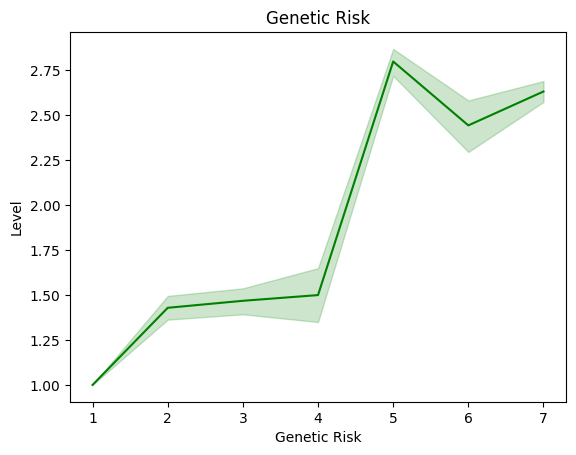

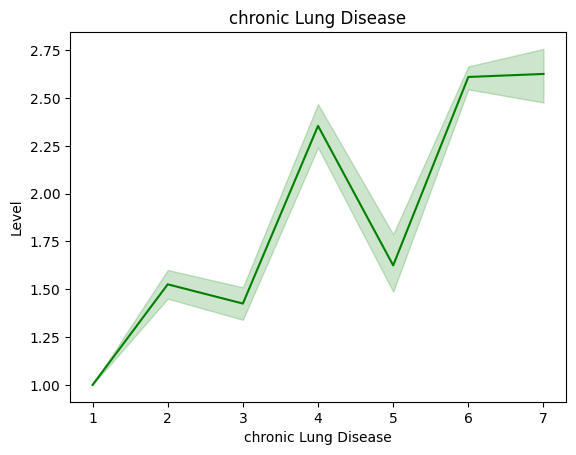

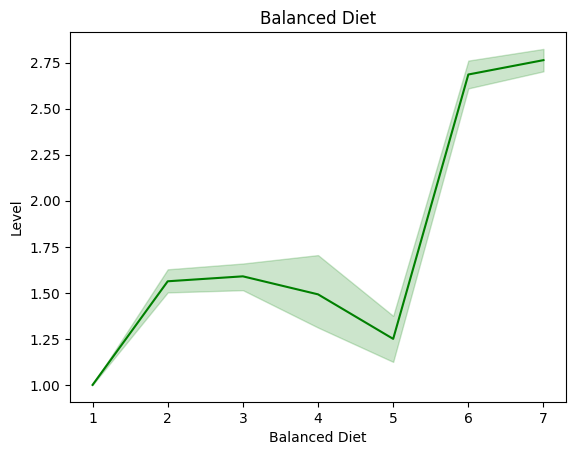

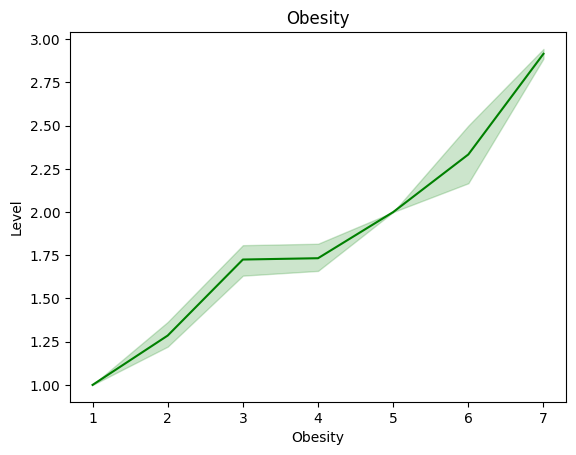

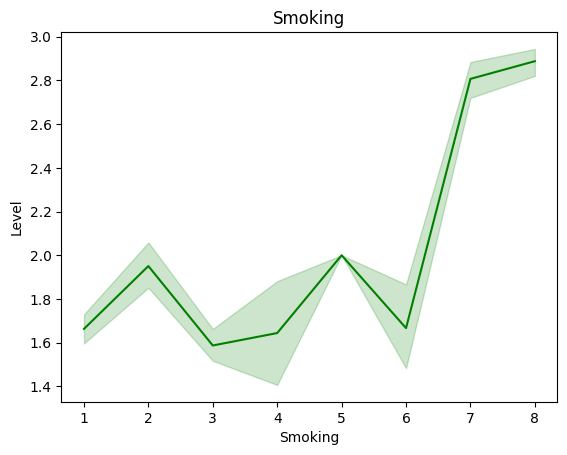

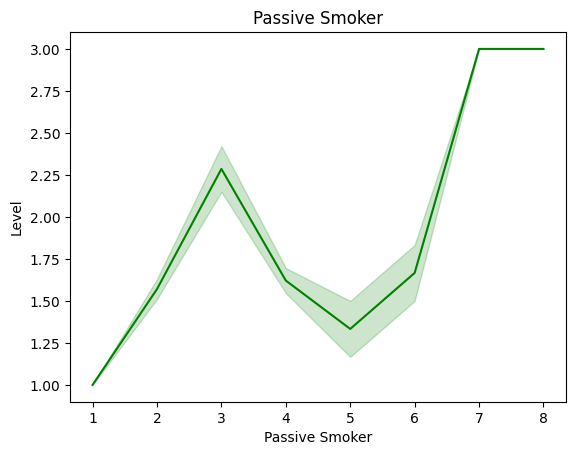

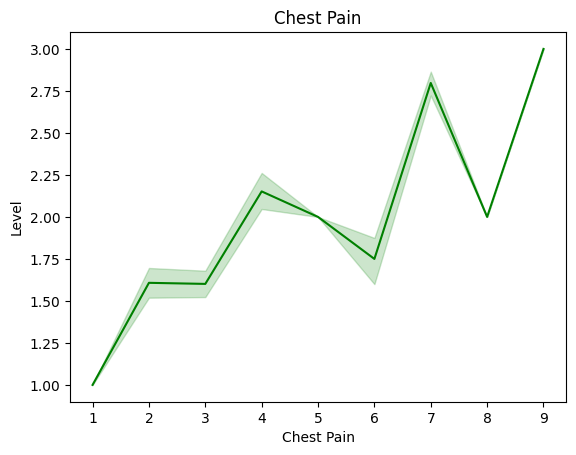

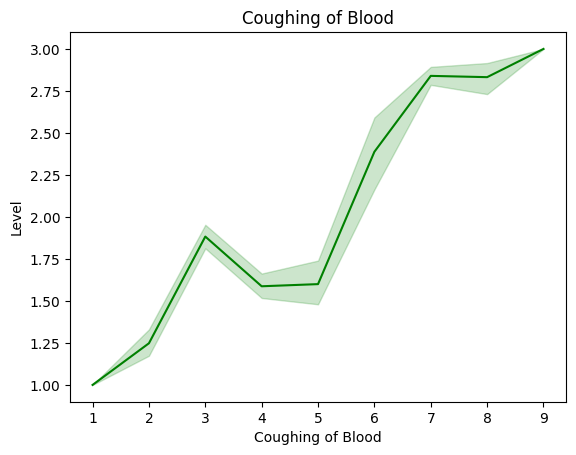

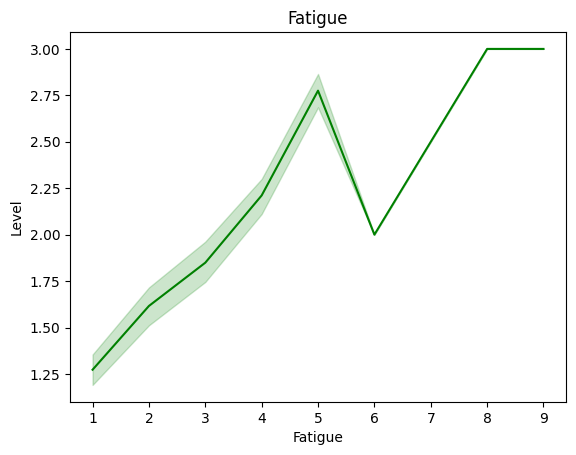

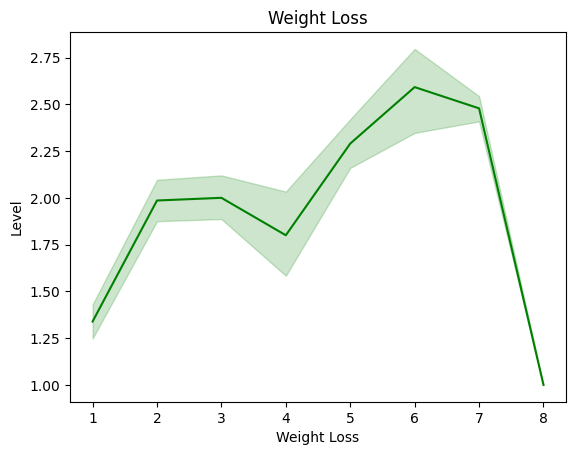

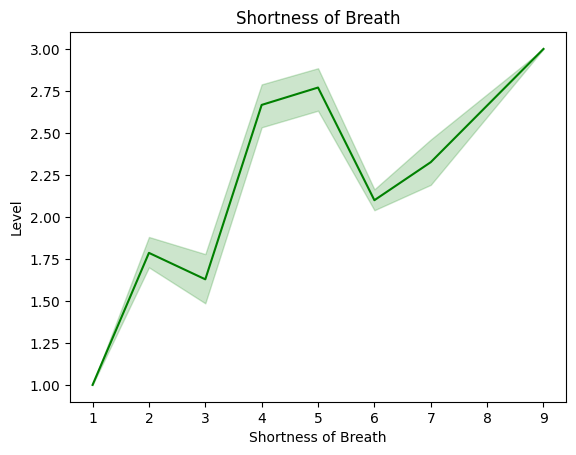

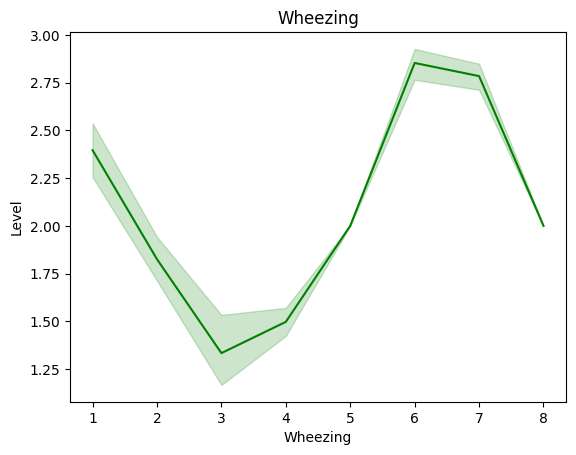

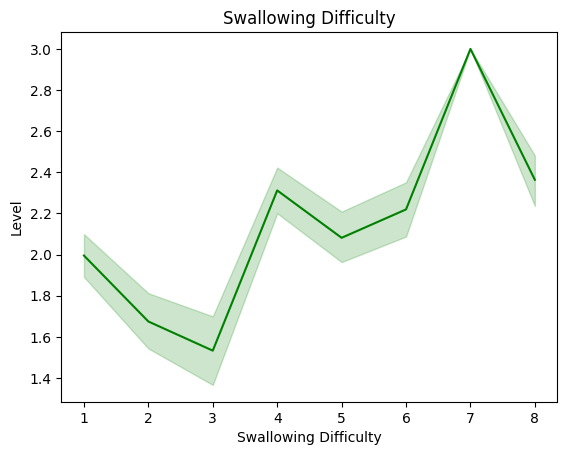

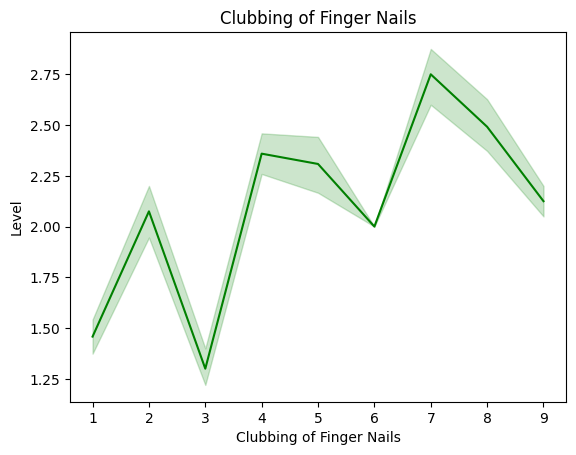

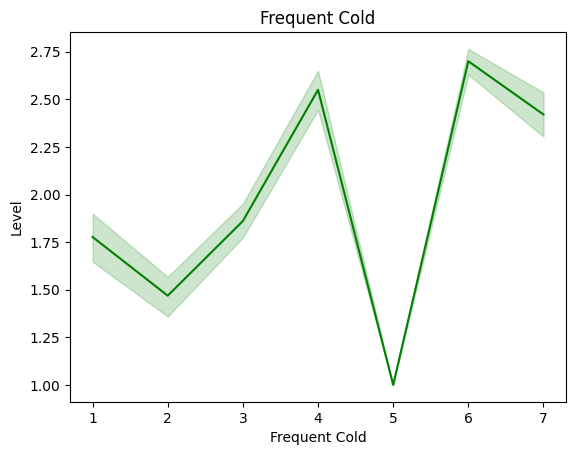

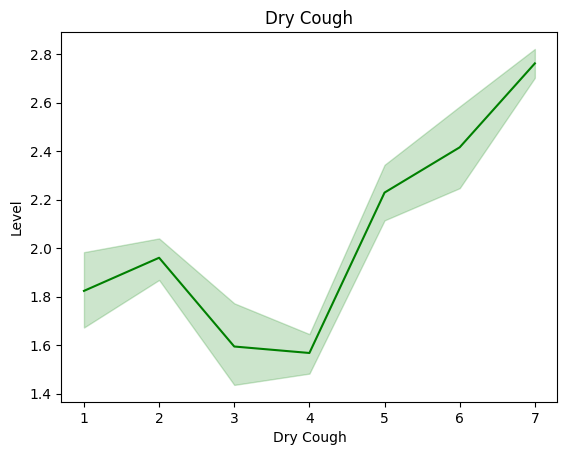

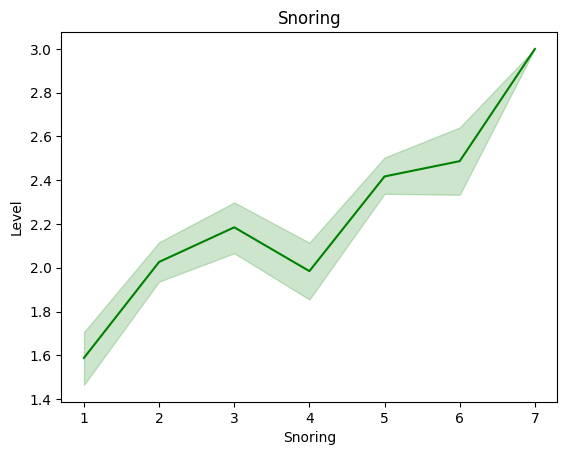

In [11]:

for i in X.columns:
  sns.lineplot(x=X[i], y=Y, color='green')
  plt.xlabel(i)
  plt.ylabel('Level')
  plt.title(i)
  plt.show()

In [12]:
# https://www.youtube.com/watch?v=S2ajzPts9ag&list=PLoROMvodv4rO5jY6RA1eFVcLVY2kJU_EL&index=2
# continue this

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
print(X.shape)

(1000, 23)


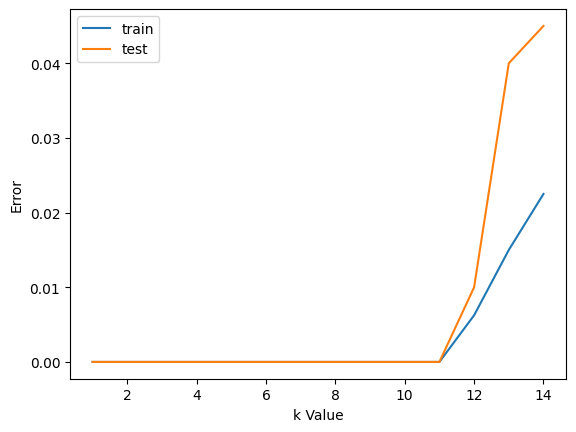

In [14]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

This graph is for hyperparameter tuning in the k-NN algorithm, helping to select the k value that generalizes best to unseen data.

The optimal k value is typically where the testing error is minimized (a balance between underfitting and overfitting).

In this graph, it seems to occur somewhere between k=6 and k=10.

For very high values of k, the model may oversimplify, leading to high error rates for both training and testing.


In [15]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

1.0

Accuracy: 1.0
Confusion Matrix:
[[62  0  0]
 [ 0 59  0]
 [ 0  0 79]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        79

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



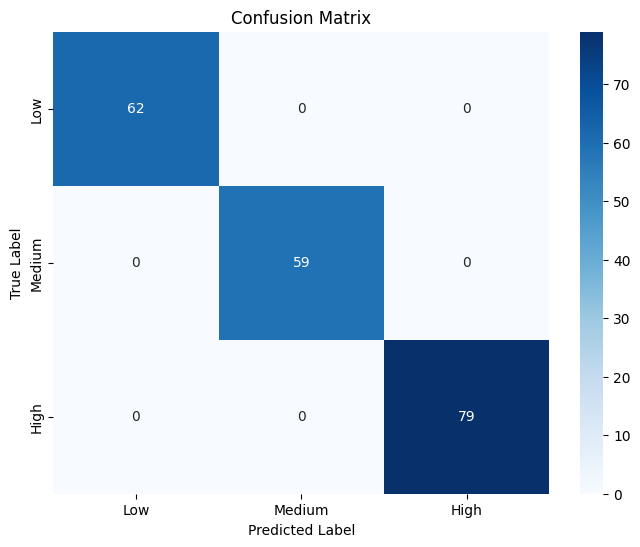

In [16]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 A perfect classification since all predictions match the true labels.

In [17]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((700, 23), (300, 23))

In [20]:

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
classifier_rf.oob_score_

1.0


### Finding best hyperparmeter for Random Forest

In [22]:

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [23]:
grid_search.best_score_

1.0

In [24]:

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)


Best model explaination

max_depth = 5  A depth of 5 limits how deep each tree can grow, preventing overfitting by controlling model complexity.

n_estimators = 10 : With 10 estimators means the forest will contain 10 decision trees.

min_samples_leaf = 5 : Setting this to 5 ensures that no leaf will have fewer than 5 samples, which helps reduce overfitting by requiring a minimum amount of data to make a split at the leaf.


### Interpret the model

[Text(0.6875, 0.9166666666666666, 'Passive Smoker <= 6.5\ngini = 0.667\nsamples = 444\nvalue = [226, 237, 237]\nclass = Medium'),
 Text(0.6041666666666666, 0.75, 'Coughing of Blood <= 7.5\ngini = 0.574\nsamples = 321\nvalue = [226, 237, 43]\nclass = Medium'),
 Text(0.6458333333333333, 0.8333333333333333, 'True  '),
 Text(0.375, 0.5833333333333334, 'Coughing of Blood <= 2.5\ngini = 0.499\nsamples = 289\nvalue = [218.0, 237.0, 0.0]\nclass = Medium'),
 Text(0.16666666666666666, 0.4166666666666667, 'Balanced Diet <= 5.5\ngini = 0.261\nsamples = 88\nvalue = [115, 21, 0]\nclass = Low'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 75\nvalue = [115, 0, 0]\nclass = Low'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 21, 0]\nclass = Medium'),
 Text(0.5833333333333334, 0.4166666666666667, 'Swallowing Difficulty <= 4.5\ngini = 0.437\nsamples = 201\nvalue = [103, 216, 0]\nclass = Medium'),
 Text(0.4166666666666667, 0.25, 'chronic Lung Disease <= 3.5\ngini = 0.499\nsamples = 

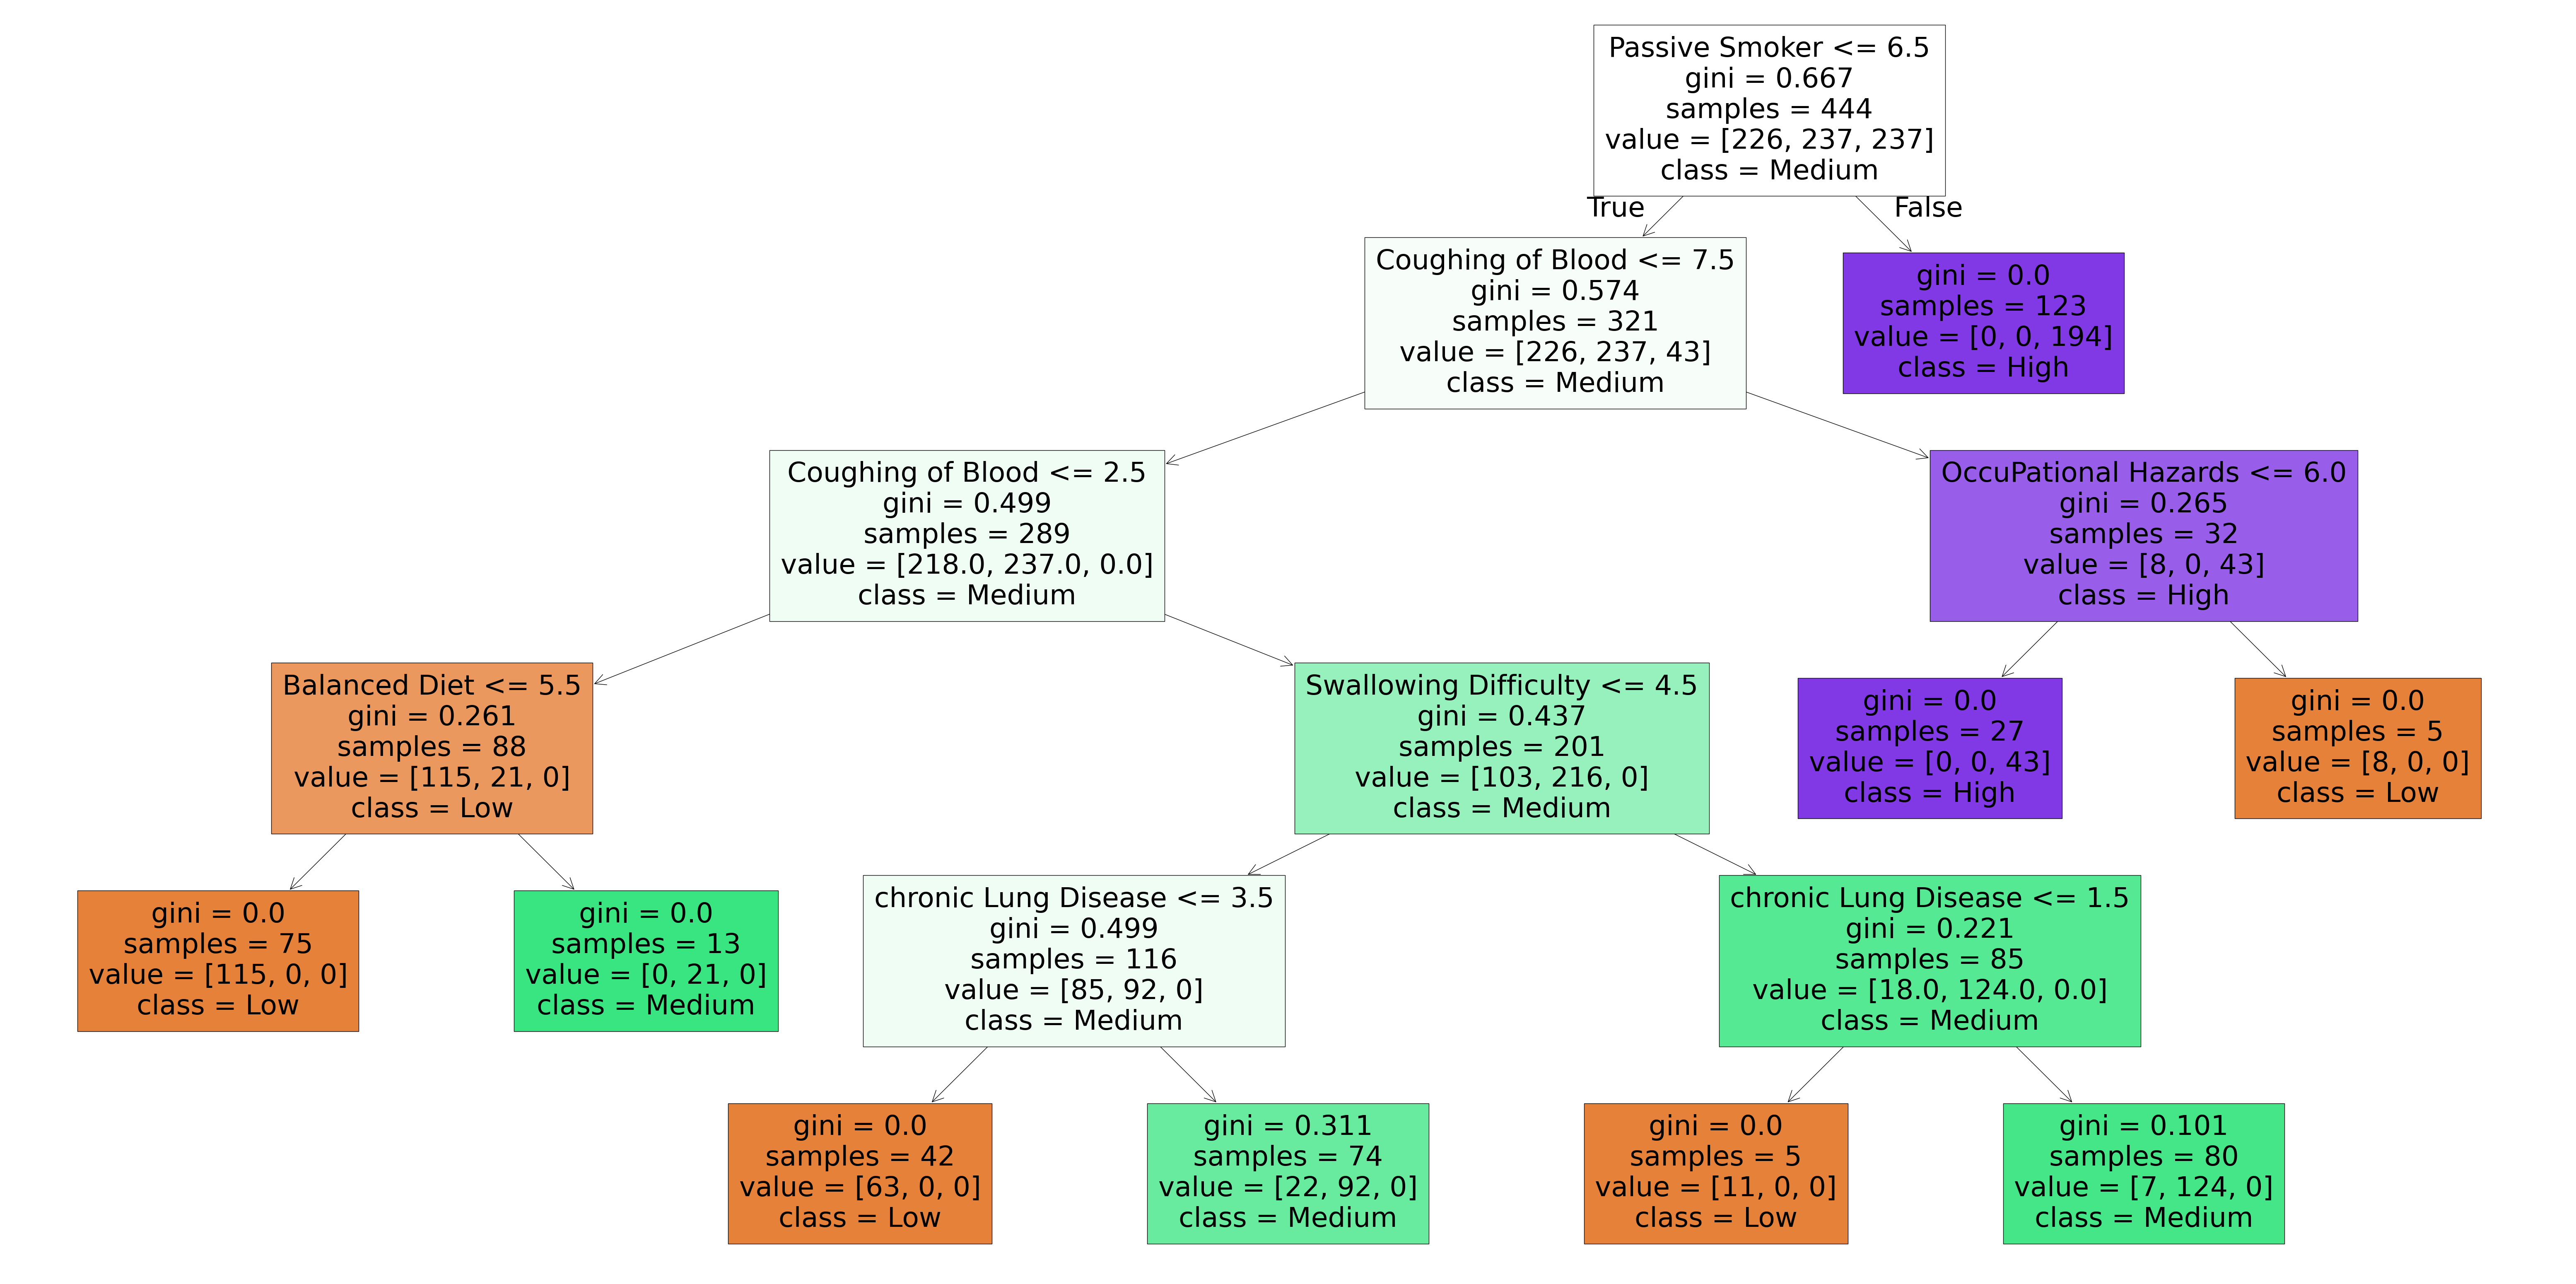

In [25]:

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Low', 'Medium', 'High'],filled=True)


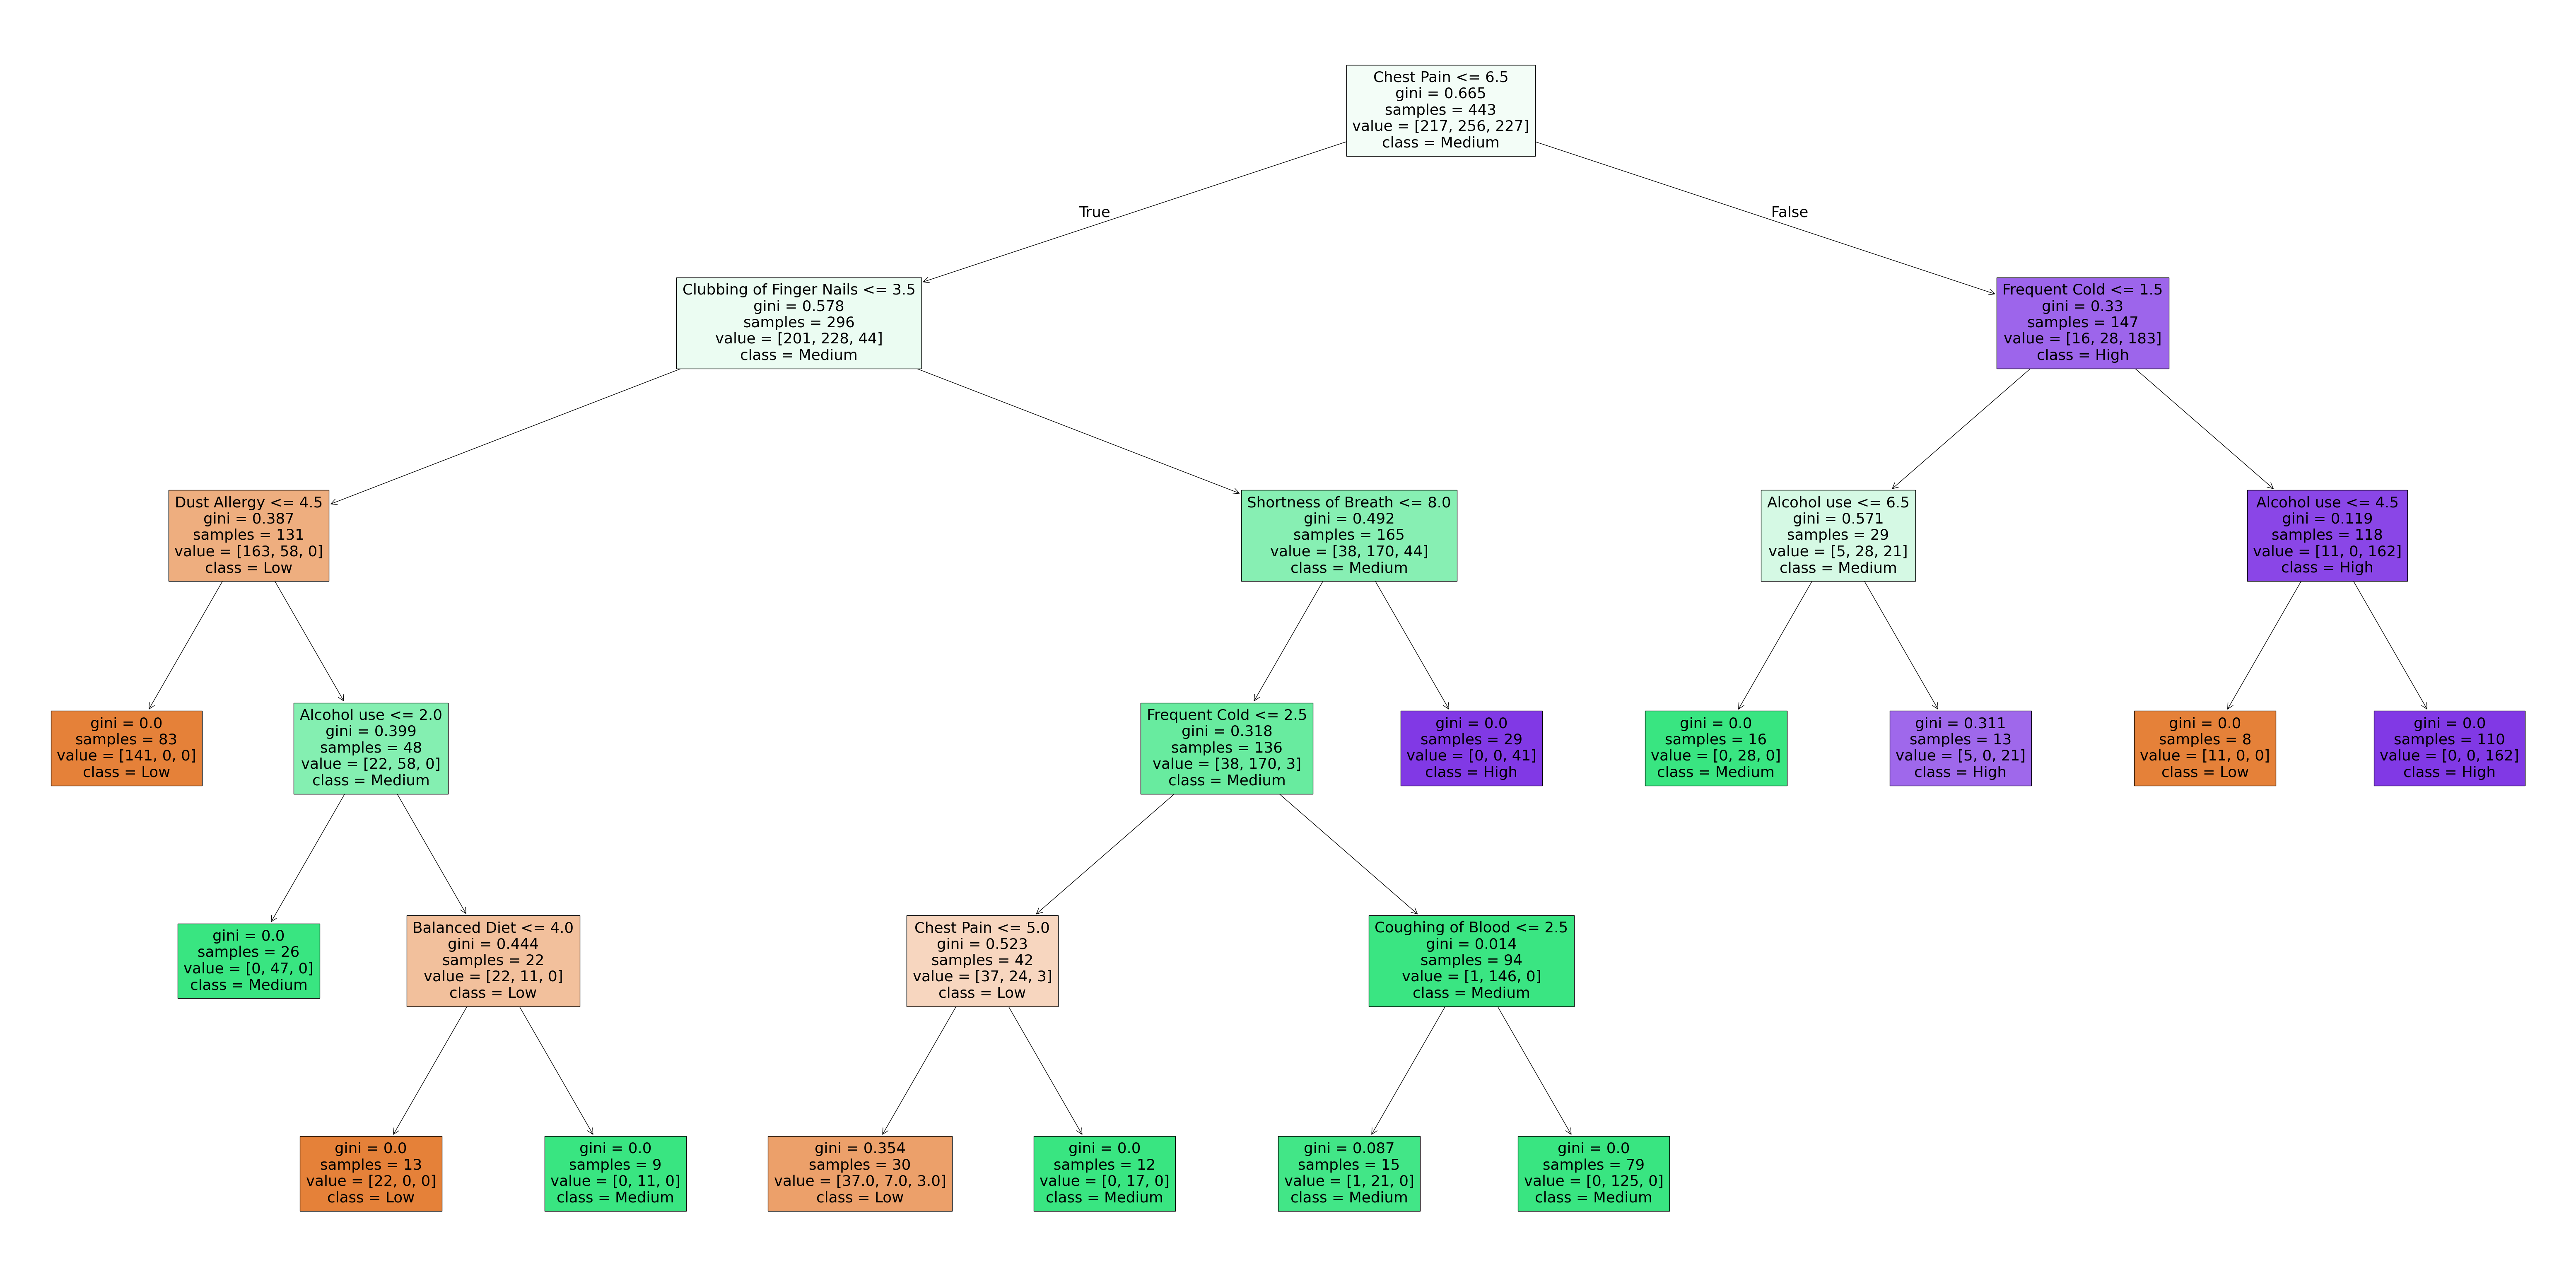

In [26]:

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Low', 'Medium', 'High'],filled=True);


In [27]:

rf_best.feature_importances_

array([0.00173824, 0.        , 0.01664668, 0.05456335, 0.04788262,
       0.01326845, 0.03832651, 0.017211  , 0.0524215 , 0.09111809,
       0.00738685, 0.09497532, 0.06392696, 0.18310858, 0.07539022,
       0.00358211, 0.05228639, 0.06519185, 0.04503147, 0.02416932,
       0.04103255, 0.00218783, 0.00855412])

In [28]:

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)


Varname       Imp
13         Coughing of Blood  0.183109
11            Passive Smoker  0.094975
9                    Obesity  0.091118
14                   Fatigue  0.075390
17                  Wheezing  0.065192
12                Chest Pain  0.063927
3                Alcohol use  0.054563
8              Balanced Diet  0.052421
16       Shortness of Breath  0.052286
4               Dust Allergy  0.047883
18     Swallowing Difficulty  0.045031
20             Frequent Cold  0.041033
6               Genetic Risk  0.038327
19  Clubbing of Finger Nails  0.024169
7       chronic Lung Disease  0.017211
2              Air Pollution  0.016647
5       OccuPational Hazards  0.013268
22                   Snoring  0.008554
10                   Smoking  0.007387
15               Weight Loss  0.003582
21                 Dry Cough  0.002188
0                        Age  0.001738
1                     Gender  0.000000

## Task 2

In [29]:
# Restart
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 50.3 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-sci-sm 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.7.5 which is incompatible.
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_sm-0.5.1.tar.gz (15.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Usi

In [30]:

from google.colab import auth
import pandas as pd
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Accessing the specific sheet from the Google Sheet URL
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1GMlqR9GryhunJTXNnvhcDQcYWAgJybuBkoTs5PQbp7I/edit?usp=sharing').worksheet('gpt-4')

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert data to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

data=df.head(1000)
data = data.astype(str)

print(data.head())

                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation  
0  Doctor: Good morning, how are you feeling toda...  
1  Doctor: Hello, how are you feeling today?\nPat...  
2  Doctor: Hello, how are you feeling today?\nPat...  
3  Doctor: Hello, how are you feeling today?\nPat...  
4  Doctor: Good morning, how are you feeling toda...  


### Cleaning the data

In [31]:
# Remove Punctuation

import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
for col in data.columns:
  data[col]= data[col].apply(lambda x:remove_punctuation(x))

data.head()

data  \
0  This 60yearold male was hospitalized due to mo...   
1  A 39yearold man was hospitalized due to an inc...   
2  One week after a positive COVID19 result this ...   
3  This 69yearold male was admitted to the ICU af...   
4  This 57yearold male was admitted to the ICU wi...   

                                        conversation  
0  Doctor Good morning how are you feeling today\...  
1  Doctor Hello how are you feeling today\nPatien...  
2  Doctor Hello how are you feeling today\nPatien...  
3  Doctor Hello how are you feeling today\nPatien...  
4  Doctor Good morning how are you feeling today\...

In [32]:
# Lowering the Text

for col in data.columns:
  data[col]= data[col].apply(lambda x: x.lower())

data.head()

data  \
0  this 60yearold male was hospitalized due to mo...   
1  a 39yearold man was hospitalized due to an inc...   
2  one week after a positive covid19 result this ...   
3  this 69yearold male was admitted to the icu af...   
4  this 57yearold male was admitted to the icu wi...   

                                        conversation  
0  doctor good morning how are you feeling today\...  
1  doctor hello how are you feeling today\npatien...  
2  doctor hello how are you feeling today\npatien...  
3  doctor hello how are you feeling today\npatien...  
4  doctor good morning how are you feeling today\...

In [33]:
# Tokenization

import re
def tokenization(text):

    if not isinstance(text, str):
        text = str(text)
    tokens = re.split(r'\s+', text)
    return tokens

#applying function to the column
for col in data.columns:
  data[col]= data[col].apply(lambda x: tokenization(x))

data.head()

data  \
0  [this, 60yearold, male, was, hospitalized, due...   
1  [a, 39yearold, man, was, hospitalized, due, to...   
2  [one, week, after, a, positive, covid19, resul...   
3  [this, 69yearold, male, was, admitted, to, the...   
4  [this, 57yearold, male, was, admitted, to, the...   

                                        conversation  
0  [doctor, good, morning, how, are, you, feeling...  
1  [doctor, hello, how, are, you, feeling, today,...  
2  [doctor, hello, how, are, you, feeling, today,...  
3  [doctor, hello, how, are, you, feeling, today,...  
4  [doctor, good, morning, how, are, you, feeling...

In [34]:
# Remove Stop words

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
for col in data.columns:
  data[col]= data[col].apply(lambda x: remove_stopwords(x))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


data  \
0  [60yearold, male, hospitalized, due, moderate,...   
1  [39yearold, man, hospitalized, due, increasing...   
2  [one, week, positive, covid19, result, 57yearo...   
3  [69yearold, male, admitted, icu, dry, cough, 2...   
4  [57yearold, male, admitted, icu, dyspnea, heav...   

                                        conversation  
0  [doctor, good, morning, feeling, today, patien...  
1  [doctor, hello, feeling, today, patient, great...  
2  [doctor, hello, feeling, today, patient, great...  
3  [doctor, hello, feeling, today, patient, good,...  
4  [doctor, good, morning, feeling, today, patien...

In [35]:
# Stemming used to reduces words to their root or base form.

from nltk.stem.porter import PorterStemmer

#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

for col in data.columns:
  data[col]= data[col].apply(lambda x: stemming(x))

data.head()

data  \
0  [60yearold, male, hospit, due, moder, ard, cov...   
1  [39yearold, man, hospit, due, increasingli, re...   
2  [one, week, posit, covid19, result, 57yearold,...   
3  [69yearold, male, admit, icu, dri, cough, 2, w...   
4  [57yearold, male, admit, icu, dyspnea, heavi, ...   

                                        conversation  
0  [doctor, good, morn, feel, today, patient, im,...  
1  [doctor, hello, feel, today, patient, great, i...  
2  [doctor, hello, feel, today, patient, great, i...  
3  [doctor, hello, feel, today, patient, good, do...  
4  [doctor, good, morn, feel, today, patient, goo...

In [36]:
# Lemmatization reducing the different forms of a word to one single form.

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

for col in data.columns:
  data[col]= data[col].apply(lambda x: lemmatizer(x))

data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


data  \
0  [60yearold, male, hospit, due, moder, ard, cov...   
1  [39yearold, man, hospit, due, increasingli, re...   
2  [one, week, posit, covid19, result, 57yearold,...   
3  [69yearold, male, admit, icu, dri, cough, 2, w...   
4  [57yearold, male, admit, icu, dyspnea, heavi, ...   

                                        conversation  
0  [doctor, good, morn, feel, today, patient, im,...  
1  [doctor, hello, feel, today, patient, great, i...  
2  [doctor, hello, feel, today, patient, great, i...  
3  [doctor, hello, feel, today, patient, good, do...  
4  [doctor, good, morn, feel, today, patient, goo...

In [37]:
# Standardizing and Spell Check

import itertools
!pip install autocorrect
from autocorrect import Speller

spell = Speller(lang='en')  # Initialize Speller outside the loop

def spellCheck(text_list):
    # Use list comprehension
    corrected_words = [spell(''.join(''.join(s)[:2] for _, s in itertools.groupby(word))) for word in text_list]
    return corrected_words

# Apply the function to all columns in the DataFrame
# for col in data.columns:
  # data[col] = data[col].apply(spellCheck)

print(data.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 37.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=7937fec82bad92822c8d8fe3e50aa3d6b555045f5182f61f21639a3d87a1d0f2
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect
                                                data  \
0  [60yearold, male, hospit, due, moder, ard, cov...   
1  [39yearold, man, hospit, due, increasingli, re...   
2  [one, week, posit, covid19, result, 57yearold,...   
3  [69yearold, male, admit, icu, dri, cough, 2, w...   
4  [57yearold, male, admit, icu, dyspnea, heavi, ...   

                                        conversation  
0  [doctor, good, morn, feel, today, patient, im,...  
1  [doctor, hello, feel, today, patient, great, i...  
2  [doctor, hello, feel, today, patient, great, i...  
3  [doctor, hello, f

### Exploratory Data Analysis (EDA)

In [38]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def extract_gender(text):
    if re.search(r'\b(she|her|female|woman|girl|miss)\b', text, re.IGNORECASE):
        return 'Female'
    # Look for male-related keywords
    elif re.search(r'\b(he|his|male|man|boy|mr)\b', text, re.IGNORECASE):
        return 'Male'
    return 'Unknown'

def extract_age(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    match = re.search(r'(\d+)\s*year', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

def extract_age_gender(text):
    age = extract_age(text)
    gender = extract_gender(text)
    return (age,gender)

df[['age', 'gender']] = df['data'].apply(lambda x: pd.Series(extract_age_gender(x)))

# Analyze retained vs. omitted portions
def analyze_retained_omitted(row):
    data_words = set(row['data'].split())
    conv_words = set(row['conversation'].split())
    retained = data_words & conv_words
    omitted = data_words - conv_words
    return pd.Series([list(retained), list(omitted)])

df[['retained', 'omitted']] = df.apply(analyze_retained_omitted, axis=1)

# Identify frequent medical terms
stop_words = set(stopwords.words('english'))

def get_medical_terms(texts):
    all_words = ' '.join(texts).split()
    filtered_words = [word.lower() for word in all_words if word.lower() not in stop_words]
    return Counter(filtered_words).most_common(10)

frequent_terms = get_medical_terms(df['data'])

# Display frequent medical terms
print("Frequent Medical Terms:")
for term, count in frequent_terms:
    print(f"{term}: {count}")

# (If date metadata were available, add analysis here)

# Display the processed dataframe
print(df)

Frequent Medical Terms:
patient: 6229
showed: 3994
left: 3562
right: 3536
revealed: 3510
history: 3022
blood: 2502
).: 2382
examination: 2145
presented: 1985
                                                   data  \
0     This 60-year-old male was hospitalized due to ...   
1     A 39-year-old man was hospitalized due to an i...   
2     One week after a positive COVID-19 result this...   
3     This 69-year-old male was admitted to the ICU ...   
4     This 57-year-old male was admitted to the ICU ...   
...                                                 ...   
3372  A 50-year-old male presented with complaints o...   
3373  DC, a 51-year-old male, underwent complete res...   
3374  A 69-year-old female patient was diagnosed wit...   
3375  A 76-year-old Caucasian, non-smoking female su...   
3376  A 20-year-old female presented to the emergenc...   

                                           conversation   age  gender  \
0     Doctor: Good morning, how are you feeling toda...  60.

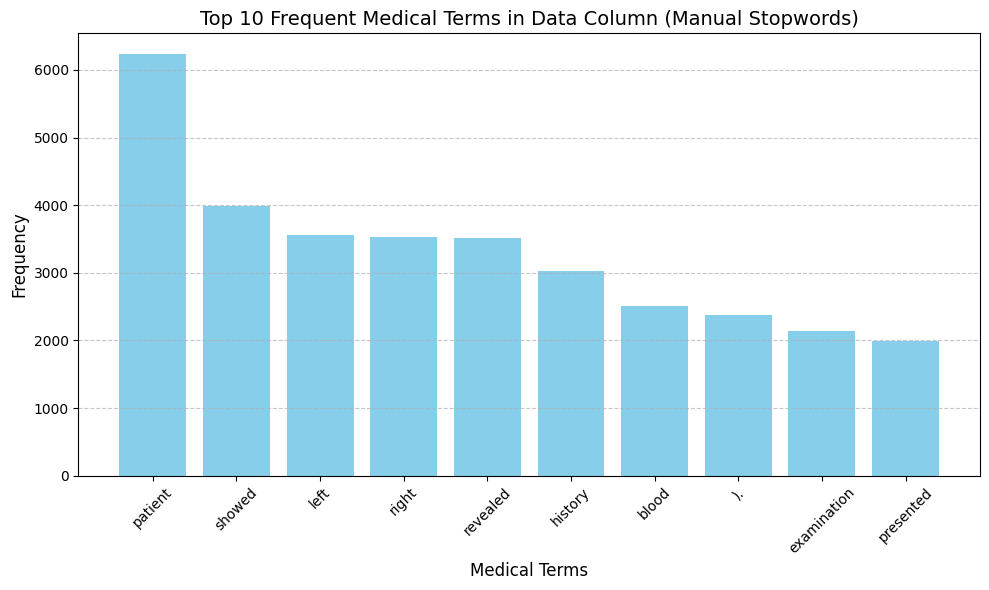

In [39]:
terms, counts = zip(*frequent_terms)
plt.figure(figsize=(10, 6))
plt.bar(terms, counts, color='skyblue')
plt.title('Top 10 Frequent Medical Terms in Data Column (Manual Stopwords)', fontsize=14)
plt.xlabel('Medical Terms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

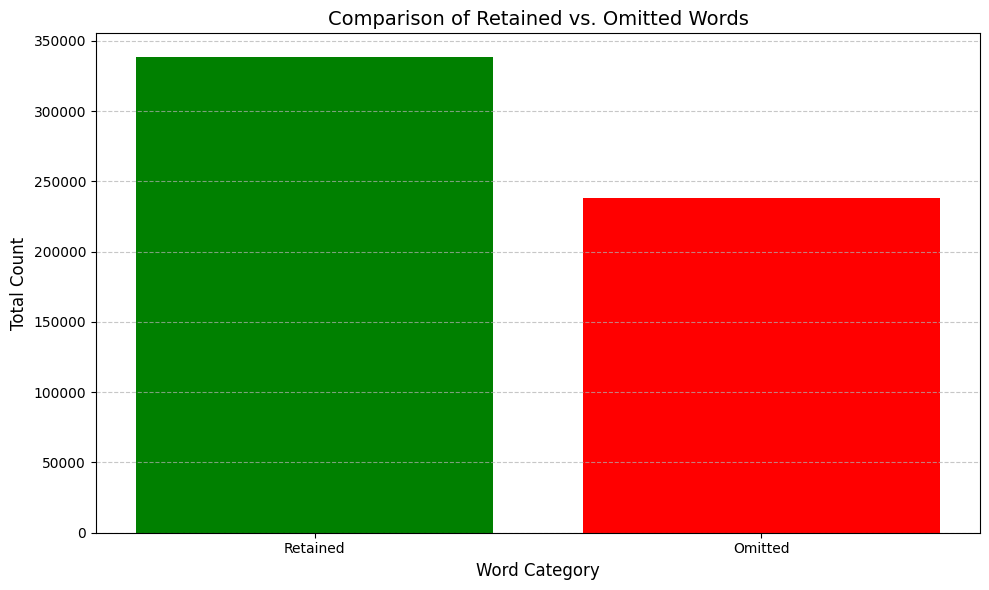

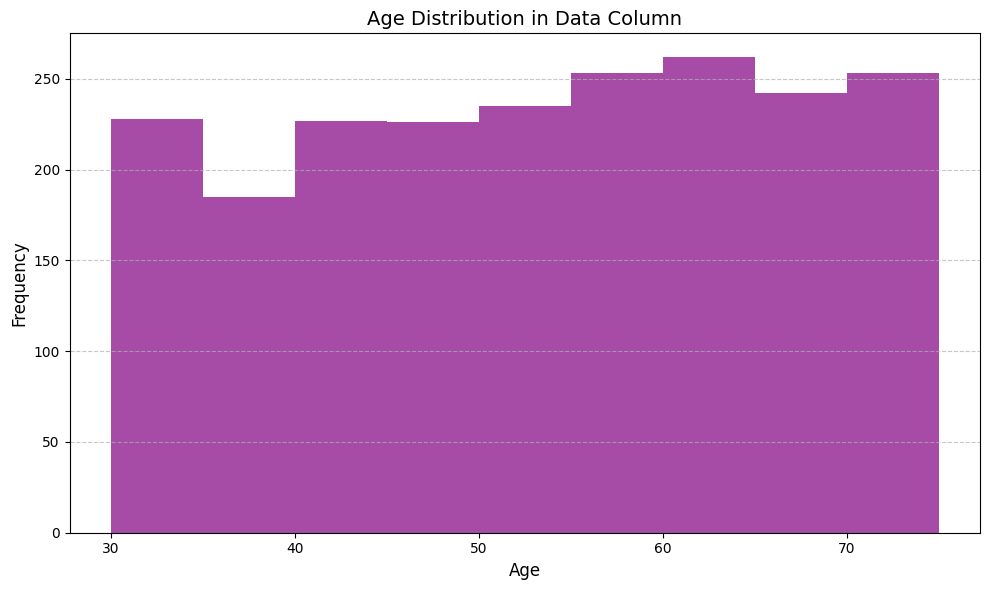

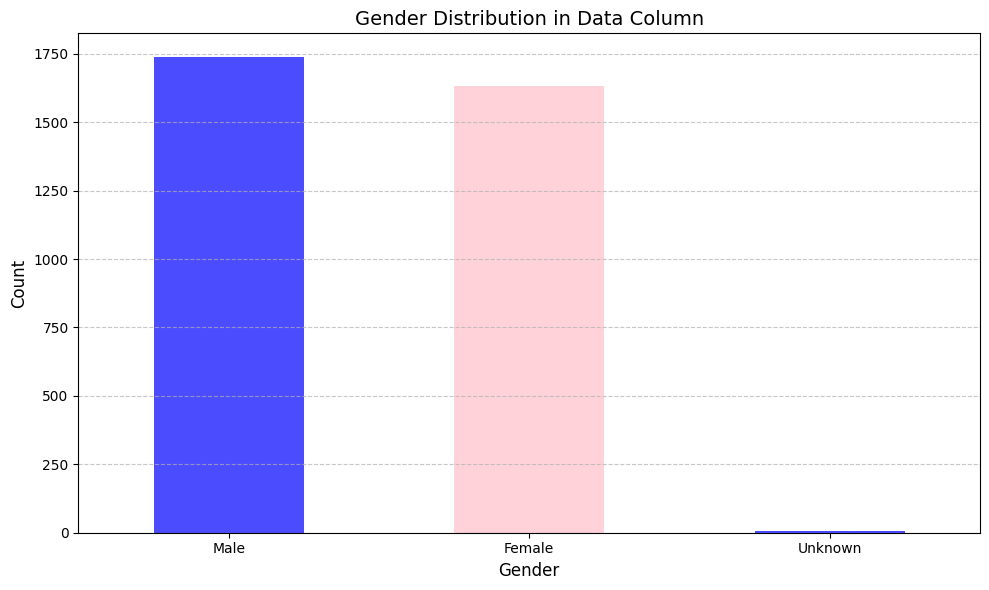

In [40]:
# 1. Visualization: Retained vs. Omitted Words
retained_counts = df['retained'].apply(len)
omitted_counts = df['omitted'].apply(len)

plt.figure(figsize=(10, 6))
plt.bar(['Retained', 'Omitted'], [retained_counts.sum(), omitted_counts.sum()], color=['green', 'red'])
plt.title('Comparison of Retained vs. Omitted Words', fontsize=14)
plt.xlabel('Word Category', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Visualization: Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=range(30, 80, 5), color='purple', alpha=0.7)
plt.title('Age Distribution in Data Column', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Visualization: Gender Distribution
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Gender Distribution in Data Column', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

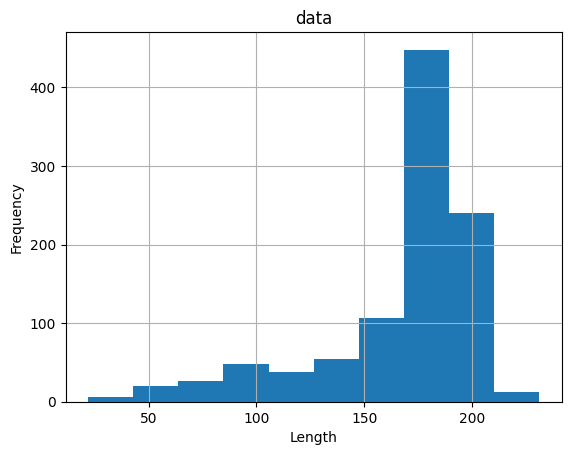

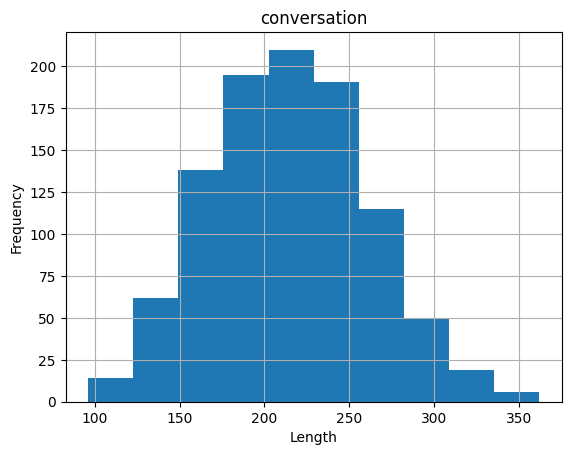

In [41]:
# Exploring the average length of data

import matplotlib.pyplot as plt

for col in data.columns:
  data[col].str.len().hist()
  plt.xlabel('Length')
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

# Data length is less than the conversion length in most of the case

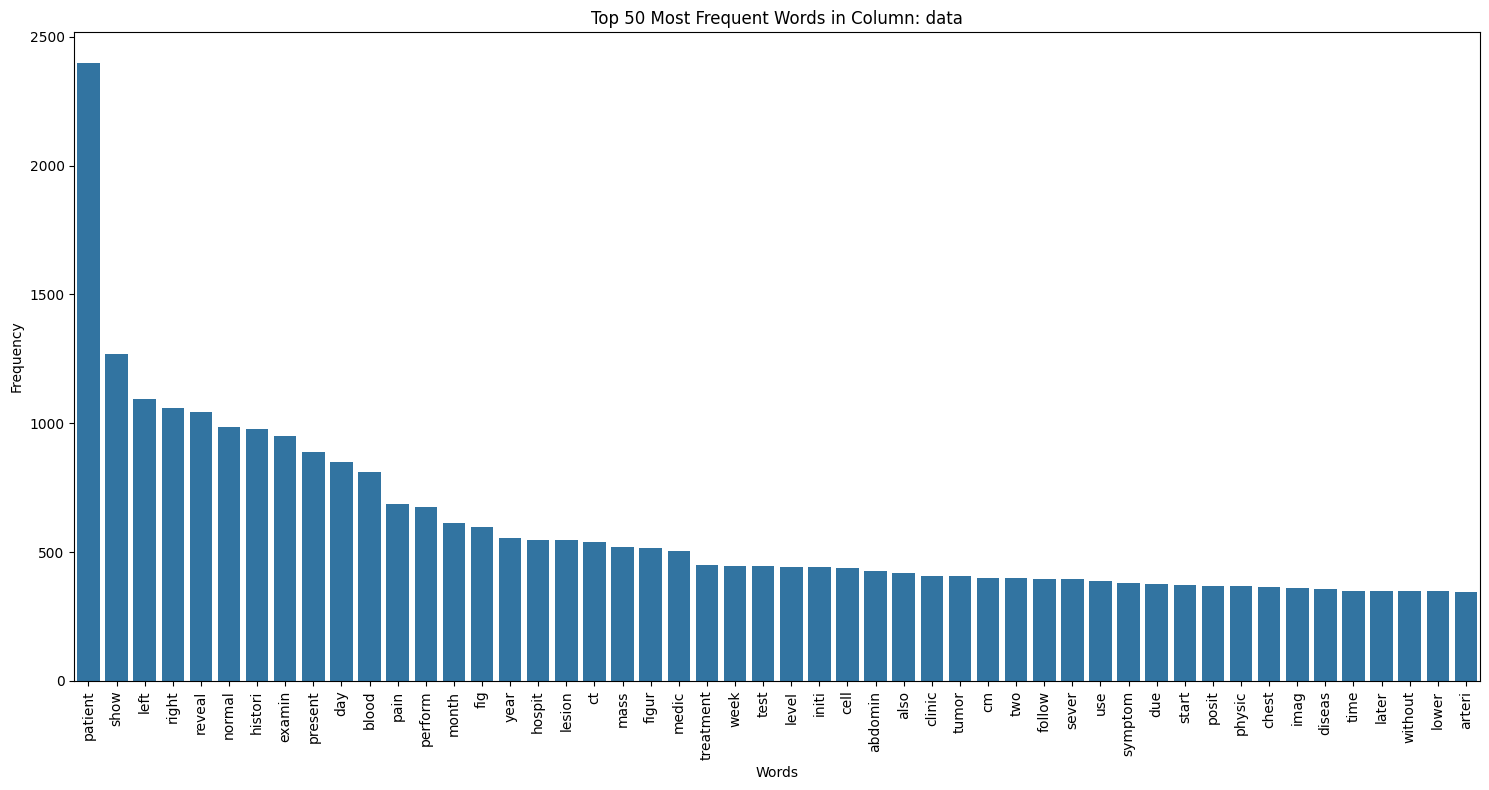

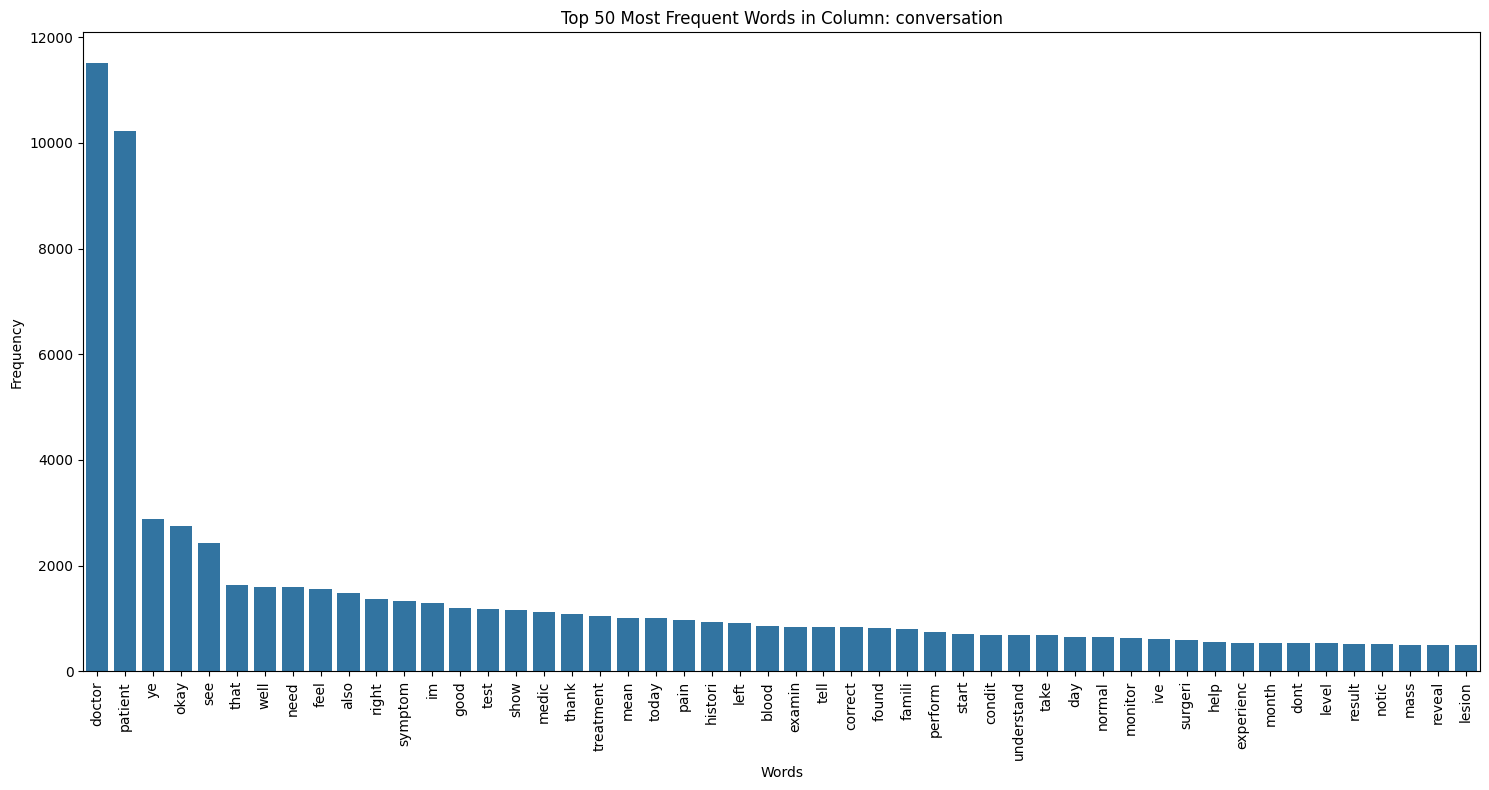

In [42]:
# Most frequent words

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

co = CountVectorizer()

for col in data.columns:
  # Join the list of tokens back into a string before passing to CountVectorizer
  data[col] = data[col].apply(lambda x: ' '.join(x))
  counts = co.fit_transform(data[col])
  top_words = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

  plt.figure(figsize=(15, 8))
  sns.barplot(x=top_words.index, y=top_words[0])
  plt.title(f"Top 50 Most Frequent Words in Column: {col}")
  plt.xticks(rotation=90)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

In [43]:
data.head()

data  \
0  60yearold male hospit due moder ard covid19 sy...   
1  39yearold man hospit due increasingli reduc ge...   
2  one week posit covid19 result 57yearold male a...   
3  69yearold male admit icu dri cough 2 week oxyg...   
4  57yearold male admit icu dyspnea heavi dri cou...   

                                        conversation  
0  doctor good morn feel today patient im feel bi...  
1  doctor hello feel today patient great ive hosp...  
2  doctor hello feel today patient great ive trou...  
3  doctor hello feel today patient good doctor iv...  
4  doctor good morn feel today patient good docto...

Top 10 Bigrams in 'data':
physic examin        248
medic histori        241
comput tomographi    233
blood pressur        202
tomographi ct        174
examin reveal        171
ct scan              171
past medic           145
emerg depart         144
lymph node           141
dtype: int64


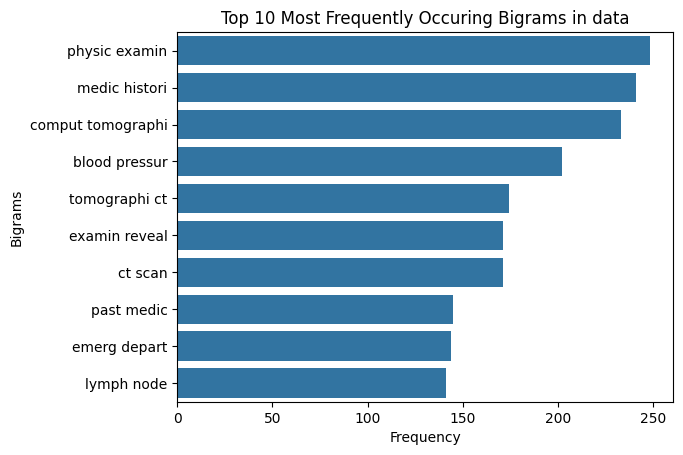

Top 10 Bigrams in 'conversation':
patient ye       2597
doctor see       1603
patient okay     1306
doctor okay      1045
ye that           808
feel today        772
okay doctor       546
patient im        544
mean doctor       517
medic histori     481
dtype: int64


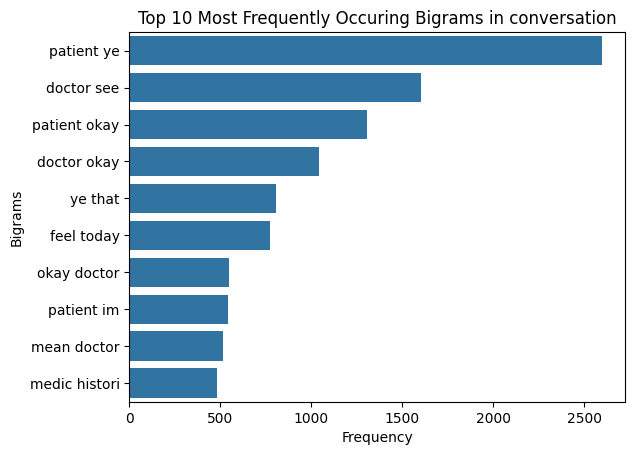

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.columns:
    # Create a CountVectorizer object with ngram_range=(2, 2)
    # min_df: minimum document frequency
    # max_df: maximum document frequency - ignore words present in all/almost all docs to filter noise
    vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2, max_df=0.9)

    # Fit and transform the text data
    X = vectorizer.fit_transform(data[col])

    # Get the feature names (bigrams)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame to store bigram counts
    bigram_counts = pd.DataFrame(X.toarray(), columns=feature_names)

    # Example: Find the 10 most frequent bigrams
    top_10_bigrams = bigram_counts.sum().sort_values(ascending=False).head(10)
    print(f"Top 10 Bigrams in '{col}':\n{top_10_bigrams}")

    # Get the vocabulary mapping (ngram to index)
    vocabulary = vectorizer.vocabulary_

    # Get bigram counts and sort
    count_values = X.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vocabulary.items()], reverse=True))
    ngram_freq.columns = ["frequency", "ngram"]

    # Plot the top 10 bigrams
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title(f'Top 10 Most Frequently Occuring Bigrams in {col}')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

### Dashboard

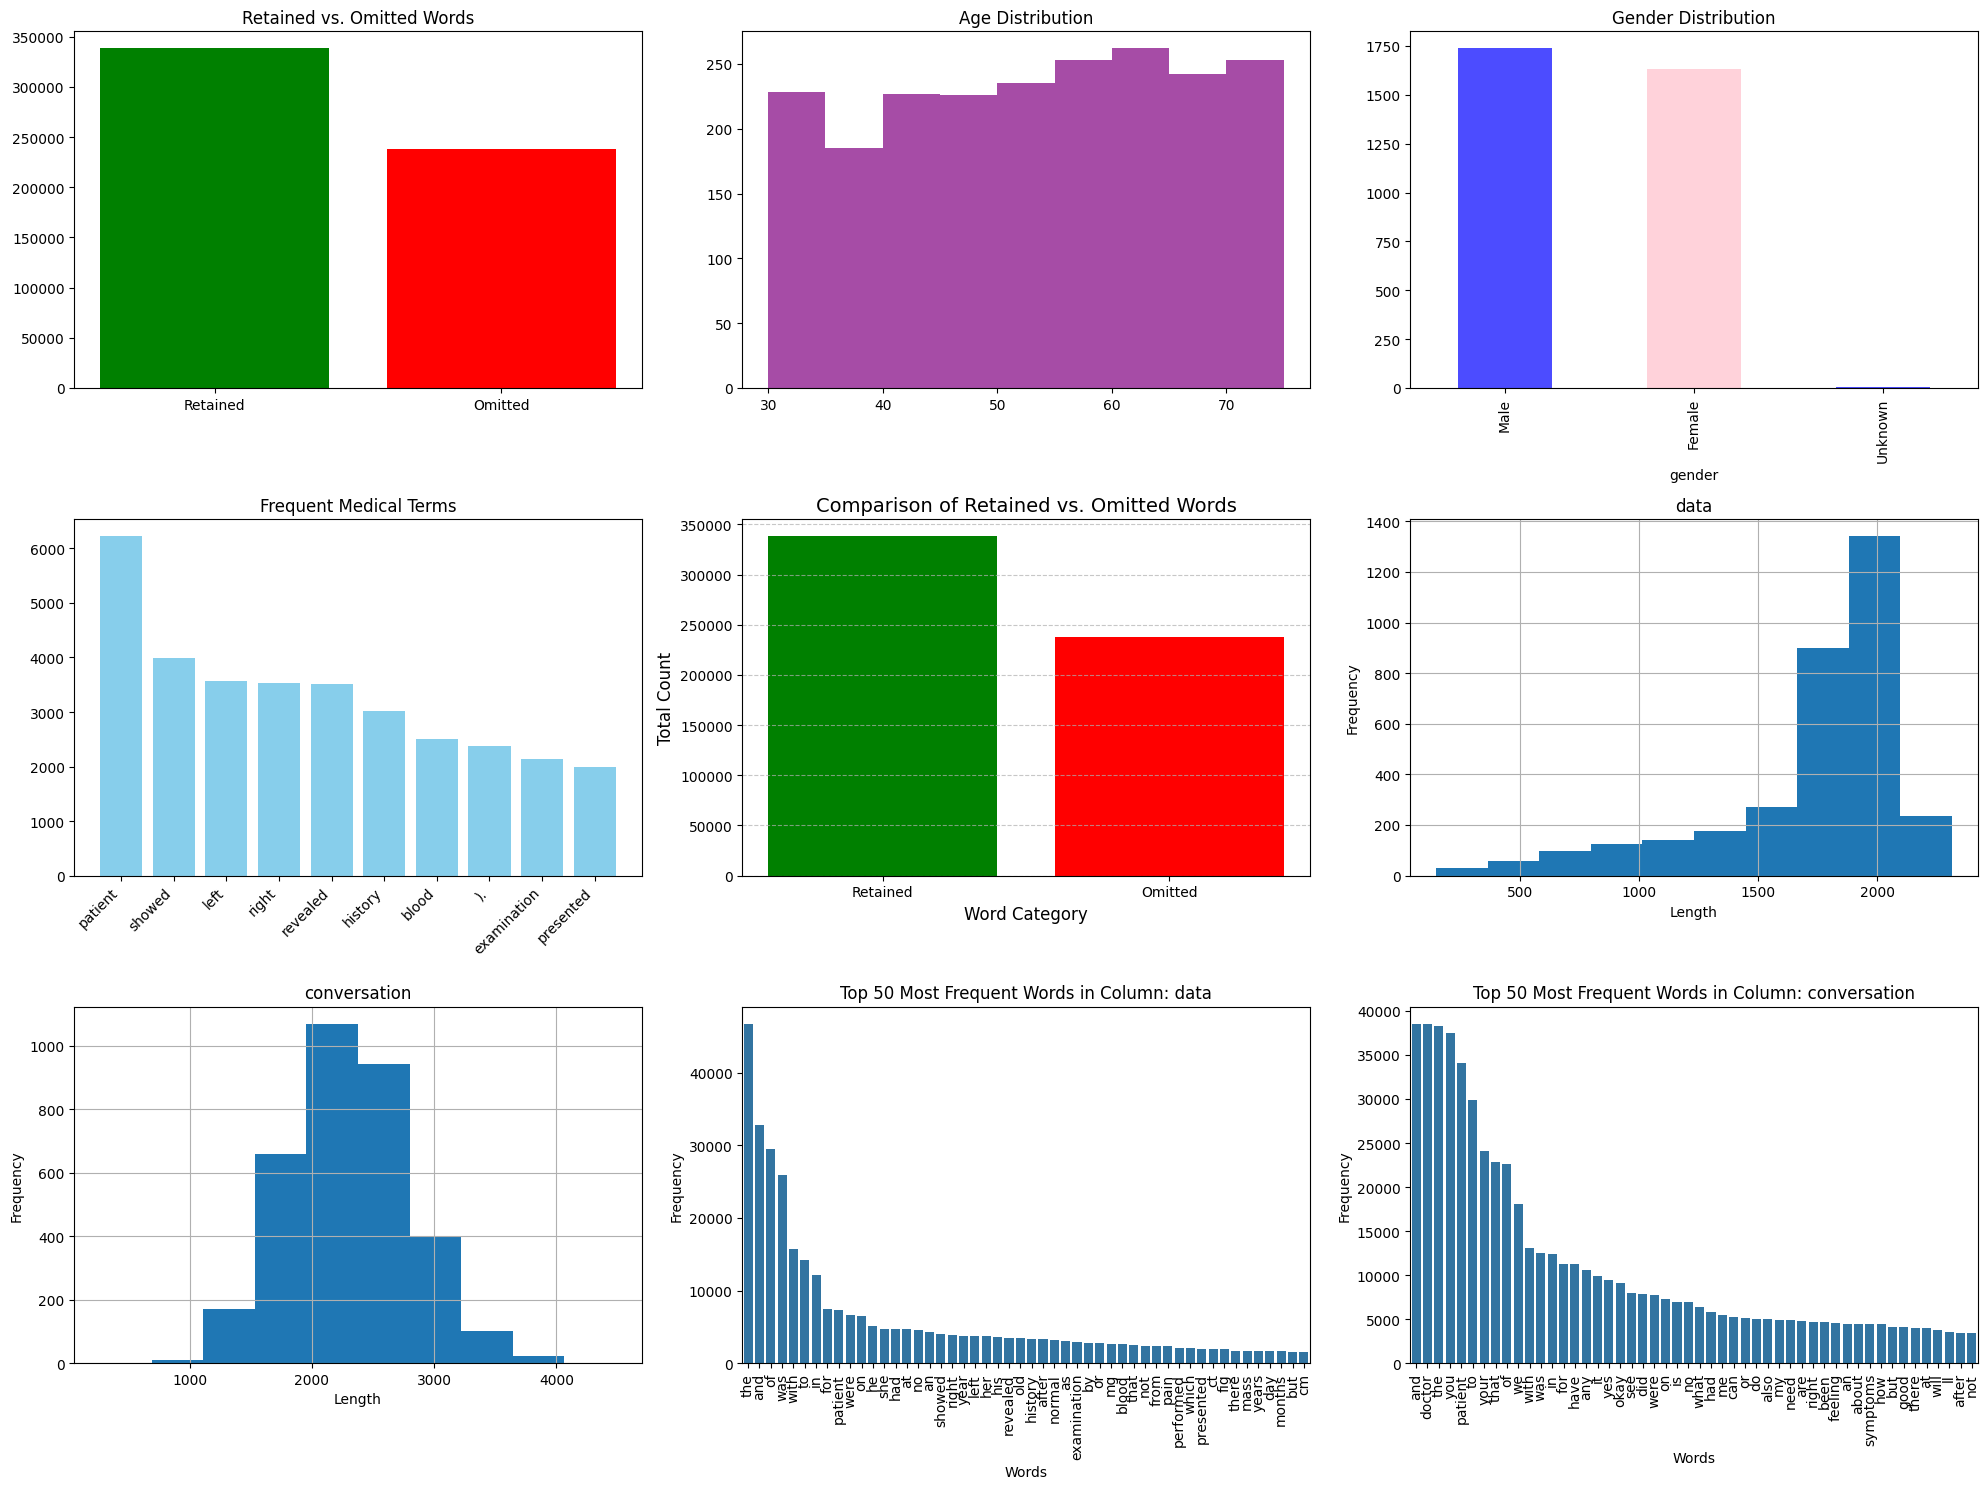

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and the visualizations are already generated as plt objects

def create_dashboard(df):
    # Create a larger figure
    plt.figure(figsize=(20, 15))

    # Subplot 1: Retained vs. Omitted Words
    plt.subplot(3, 3, 1)  # 2 rows, 3 columns, first subplot
    retained_counts = df['retained'].apply(len)
    omitted_counts = df['omitted'].apply(len)
    plt.bar(['Retained', 'Omitted'], [retained_counts.sum(), omitted_counts.sum()], color=['green', 'red'])
    plt.title('Retained vs. Omitted Words')


    # Subplot 2: Age Distribution
    plt.subplot(3, 3, 2)
    plt.hist(df['age'].dropna(), bins=range(30, 80, 5), color='purple', alpha=0.7)
    plt.title('Age Distribution')


    # Subplot 3: Gender Distribution
    plt.subplot(3, 3, 3)
    gender_counts = df['gender'].value_counts()
    gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
    plt.title('Gender Distribution')


    # Subplot 4: Frequent Medical Terms
    plt.subplot(3, 3, 4)
    terms, counts = zip(*frequent_terms)  # Assuming frequent_terms is defined earlier
    plt.bar(terms, counts, color='skyblue')
    plt.title('Frequent Medical Terms')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability


    # Subplot 5 and 6:  Add more relevant plots here if you have more data
    # For example, plot of data length or bigrams
    plt.subplot(3,3,5)
    plt.bar(['Retained', 'Omitted'], [retained_counts.sum(), omitted_counts.sum()], color=['green', 'red'])
    plt.title('Comparison of Retained vs. Omitted Words', fontsize=14)
    plt.xlabel('Word Category', fontsize=12)
    plt.ylabel('Total Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(3,3,6)
    df['data'].astype(str).str.len().hist()
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('data')

    plt.subplot(3,3,7)
    df['conversation'].astype(str).str.len().hist()
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('conversation')

    plt.subplot(3,3,8)
    co = CountVectorizer()
    data = df.reset_index(drop=True)
    data['data'] = data['data'].astype(str)
    if data['data'].apply(lambda x: isinstance(x, list)).any():
        data['data'] = data['data'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    counts = co.fit_transform(data['data'])
    top_words = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(50)
    sns.barplot(x=top_words.index, y=top_words[0])
    plt.title(f"Top 50 Most Frequent Words in Column: data")
    plt.xticks(rotation=90)
    plt.xlabel("Words")
    plt.ylabel("Frequency")


    plt.subplot(3,3,9)
    co = CountVectorizer()
    data = df.reset_index(drop=True)
    data['conversation'] = data['conversation'].astype(str)
    if data['conversation'].apply(lambda x: isinstance(x, list)).any():
        data['conversation'] = data['conversation'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    counts = co.fit_transform(data['conversation'])
    top_words = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(50)
    sns.barplot(x=top_words.index, y=top_words[0])
    plt.title(f"Top 50 Most Frequent Words in Column: conversation")
    plt.xticks(rotation=90)
    plt.xlabel("Words")
    plt.ylabel("Frequency")


    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
create_dashboard(df)

### Model

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all symptom data into a single column (if needed)
data['combined'] = data['data'] + data['conversation']

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (1000, 1000)


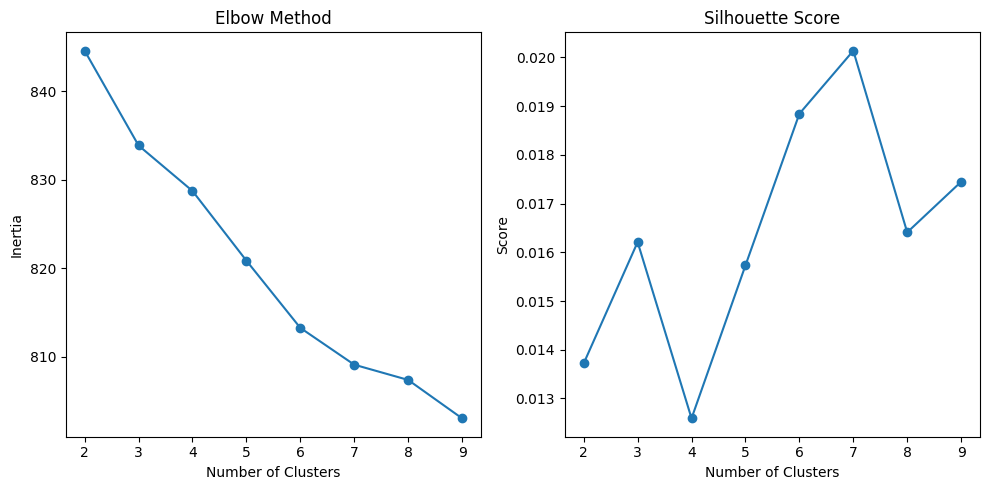

Cluster assignment: cluster
1    381
2    373
0    246
Name: count, dtype: int64


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

# Plot Elbow and Silhouette Score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Fit K-Means with optimal clusters (e.g., k=3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

print("Cluster assignment:", data['cluster'].value_counts())


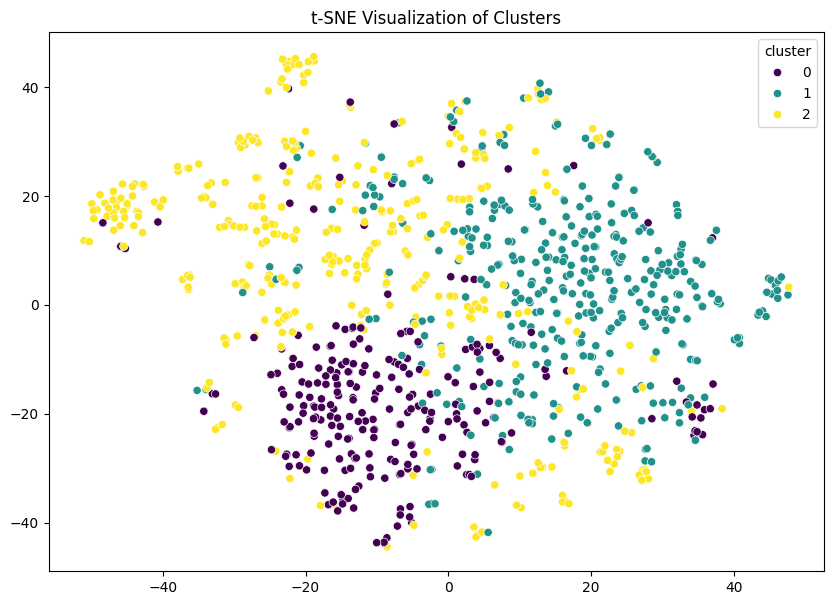

In [48]:
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce TF-IDF dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Plot t-SNE visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data['cluster'], palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()


In [49]:
data.head()

data  \
0  60yearold male hospit due moder ard covid19 sy...   
1  39yearold man hospit due increasingli reduc ge...   
2  one week posit covid19 result 57yearold male a...   
3  69yearold male admit icu dri cough 2 week oxyg...   
4  57yearold male admit icu dyspnea heavi dri cou...   

                                        conversation  \
0  doctor good morn feel today patient im feel bi...   
1  doctor hello feel today patient great ive hosp...   
2  doctor hello feel today patient great ive trou...   
3  doctor hello feel today patient good doctor iv...   
4  doctor good morn feel today patient good docto...   

                                            combined  cluster  
0  60yearold male hospit due moder ard covid19 sy...        1  
1  39yearold man hospit due increasingli reduc ge...        1  
2  one week posit covid19 result 57yearold male a...        1  
3  69yearold male admit icu dri cough 2 week oxyg...        1  
4  57yearold male admit icu dyspnea heavi dri cou...        1

In [50]:
!pip install spacy
!pip install scispacy
import spacy
import scispacy

# Load the domain-specific NLP model
nlp = spacy.load("en_core_sci_sm")

# Example symptom lexicon (expand as needed)
symptom_lexicon = {
    "fever",
    "headache",
    "nausea",
    "cough",
    "fatigue",
    "pain",
    "rash",
    "dizziness",
    "vomiting",
    "diarrhea",
    "constipation",
    "abdominal pain",
    "chest pain",
    "shortness of breath",
    "sore throat",
    "runny nose",
    "sneezing",
    "muscle aches",
    "joint pain",
    "swelling",
    "redness",
    "itching",
    "burning",
    "numbness",
    "tingling",
    "weakness",
    "fatigue",
    "loss of appetite",
    "weight loss",
    "weight gain",
    "sleep disturbances",
    "mood changes",
    "anxiety",
    "depression",
}


def extract_symptoms(text):
    doc = nlp(text)
    symptoms = set()

    # Extract entities and filter by symptom lexicon or heuristic matching
    for ent in doc.ents:
        if ent.text.lower() in symptom_lexicon:
            symptoms.add(ent.text)

    # Augment with exact string matching for additional symptom detection
    for word in text.split():
        if word.lower() in symptom_lexicon:
            symptoms.add(word)

    return list(symptoms)


# Assuming 'data' is your DataFrame and 'combined' is the column with medical text
data["extracted_symptoms"] = data["combined"].apply(extract_symptoms)

# Display the results
print(data[["combined", "extracted_symptoms"]])

  Using cached spacy-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached spacy-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
Using cached thinc-8.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (920 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-sci-sm 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.7.5 which is incompatible.


/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


                                              combined  \
0    60yearold male hospit due moder ard covid19 sy...   
1    39yearold man hospit due increasingli reduc ge...   
2    one week posit covid19 result 57yearold male a...   
3    69yearold male admit icu dri cough 2 week oxyg...   
4    57yearold male admit icu dyspnea heavi dri cou...   
..                                                 ...   
995  55yearold male patient nuchal pain c3–c4 level...   
996  rare case pmbish 21yearold femal china postpar...   
997  present case 33yearold woman genet confirm ost...   
998  42yearold woman present emerg depart acut onse...   
999  asymptomat 62yearold man present urologist che...   

            extracted_symptoms  
0               [cough, fever]  
1               [cough, fever]  
2                           []  
3                      [cough]  
4               [cough, fever]  
..                         ...  
995                     [pain]  
996  [chest pain, pain, fever]  
997   

In [51]:
# Convert symptoms into numerical formats using TF-IDF


# Convert symptom lists to strings for TF-IDF
data['extracted_symptoms_str'] = data['extracted_symptoms'].apply(lambda x: ' '.join(x))

# TF-IDF on extracted symptoms
symptom_tfidf_matrix = tfidf_vectorizer.transform(data['extracted_symptoms_str'])

print("Symptom TF-IDF matrix shape:", symptom_tfidf_matrix.shape)

# Now you have a TF-IDF representation of the extracted symptoms, stored in 'symptom_tfidf_matrix'
# You can use this matrix for further analysis, clustering, or classification tasks.

Symptom TF-IDF matrix shape: (1000, 1000)


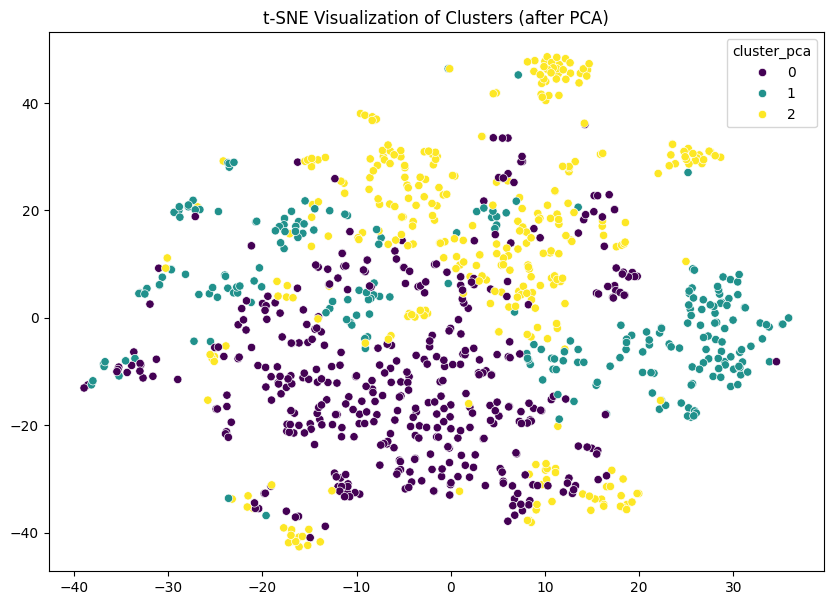

In [52]:
# Simplify feature vectors using PCA and t-SNE for clustering.

from sklearn.decomposition import PCA

# Assuming 'tfidf_matrix' is your TF-IDF matrix and you want to reduce to 50 dimensions
pca = PCA(n_components=50)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Now 'pca_result' contains the reduced feature vectors.  You can use this in place of
# tfidf_matrix in your clustering or other downstream tasks

# Example: Re-run KMeans with reduced features
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster_pca'] = kmeans.fit_predict(pca_result)

# Visualize with t-SNE (optional)
tsne = TSNE(n_components=2, random_state=42)
tsne_pca_results = tsne.fit_transform(pca_result)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_pca_results[:, 0], y=tsne_pca_results[:, 1], hue=data['cluster_pca'], palette='viridis')
plt.title('t-SNE Visualization of Clusters (after PCA)')
plt.show()

In [53]:
# Apply algorithms like k-means clustering to group similar cases and show the top 20 symtopms

feature_names = tfidf_vectorizer.get_feature_names_out()

symptom_sums = symptom_tfidf_matrix.sum(axis=0)

symptom_importance = pd.DataFrame({'symptom': feature_names, 'tfidf_sum': symptom_sums.A1})

top_symptoms = symptom_importance.sort_values(by='tfidf_sum', ascending=False)

# Display the top 20 symptoms
print("Top 50 Symptoms:")
print(top_symptoms.head(50))

Top 50 Symptoms:
       symptom   tfidf_sum
645       pain  341.535780
352      fever  133.476881
204      cough   79.680615
597     nausea   54.362754
250   diarrhea   47.051052
724       rash   44.006511
984     weight   14.292018
522       loss    8.921483
159      chest    7.084049
486      joint    1.052109
659     pelvic    0.000000
686    potenti    0.000000
660  percentil    0.000000
661    perform    0.000000
662  pericardi    0.000000
663     period    0.000000
664   peripher    0.000000
665    periton    0.000000
685  potassium    0.000000
666    persist    0.000000
667     physic    0.000000
668  physician    0.000000
684     postop    0.000000
669      place    0.000000
683  posterior    0.000000
671       plan    0.000000
682    possibl    0.000000
681      posit    0.000000
672     plasma    0.000000
673   platelet    0.000000
680     portal    0.000000
674       plea    0.000000
675    pleural    0.000000
676  pneumonia    0.000000
677      point    0.000000
678       p